Please fill out:
* Student name: Tamjid Ahsan
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

# INTRODUCTION

<img src="./assets/image_1.png"
     alt="Map!"
     style="float: center; margin-center: 2px;">
     
Source: image generated by author using tableau public.

## Overview

## Business problem

King County Residents that want to renovate their home to increase its resale value, but don't know what factors are important for determining a home's value. While focusing on features they can renovate, you can still discuss key factors of a home's price that are outside of their control. 

## Recommendation

# The imports

## Packages

In [1]:
# operational packeges
import os
import warnings
import pandas as pd
pd.set_option('display.max_columns',0)
import numpy as np
# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
# Statistics
import statistics as stat
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset() 

## Functions used

### Exploration

In [2]:
def check_NaN(df):
    """
    Checks for NaN in the pandas DataFrame and spits a DataFrame of report.
    Uses df.isnull() method.
    
    Parameters:
    ===========
    df = pandas.DataFrame
    """
    null_checking = []
    for column in df.columns:
        not_null = df[column].isnull().value_counts()[0]
        try:
            is_null = df[column].isnull().value_counts()[1]
        except:
            is_null = 0
        temp_dict = {'name': column, 'is_null': is_null, 'not_null': not_null}
        null_checking.append(temp_dict)
    df_ = pd.DataFrame(null_checking)
    return df_

In [3]:
def check_duplicates(df):
    """
    Checks for duplicates in the pandas DataFrame and splits a Dataframe of report.
    
    Parameters:
    ===========
    df = pandas.DataFrame
    """
    dup_checking = []
    for column in df.columns:
        not_duplicated = df[column].duplicated().value_counts()[0]
        try:
            duplicated = df[column].duplicated().value_counts()[1]
        except:
            duplicated = 0
        temp_dict = {
            'name': column,
            'duplicated': duplicated,
            'not_duplicated': not_duplicated
        }
        dup_checking.append(temp_dict)
    df_ = pd.DataFrame(dup_checking)
    return df_

In [4]:
def correlation_top_bottom(df):
    """
    Input a Pandas correlation matrix DataFrame (df.corr()) to get top 10 positive and negetively correlated features.
    
    Parameters:
    ===========
    df = pandas.core.frame.DataFrame; use df.corr().
    """
    corr_df_matrix_ = df.unstack().reset_index()
    corr_df_matrix_.columns = ["feature_0", 'feature_1', 'correlation']
    corr_df_matrix_['keep'] = corr_df_matrix_.apply(
        lambda x: False if x['feature_0'] == x['feature_1'] else True, axis=1)
    corr_df_matrix_['feature_combo'] = corr_df_matrix_.apply(
        lambda x: ' and '.join(set(x[['feature_0', 'feature_1']])), axis=1)
    corr_featurs = corr_df_matrix_[corr_df_matrix_.keep][[
        'feature_combo', 'correlation'
    ]].drop_duplicates().sort_values(by='correlation', ascending=False)
    print(
        f'Positive correlations:\n{corr_featurs.head(10).reset_index()}\n\n{"-"*70}\nNegative correlations:\n{corr_featurs.sort_values(by="correlation").head(10).reset_index()}'
    )

In [5]:
def format_number(data_value, index):
    # Number formatter
    """
    Formats values to thousands, millions and billions.
    Used for modifying chart axes.
    +++ formatting helper function +++
    """
    if data_value >= 1_000_000_000:
        formatter = '${:1.1f}B'.format(data_value * 0.000_000_001)
    elif data_value >= 1_000_000:
        formatter = '${:1.0f}M'.format(data_value * 0.000_001)
    else:
        formatter = '${:1.0f}K'.format(data_value * 0.001)
    return formatter

In [6]:
def feature_prob_details(x, alpha=.05):
    """
    Displays:
    =========
    Plots boxplot, density plot, cdf and probability plot with fitting of given data.
    Decison based on both:
    Shapiro-Wilk Test and Kolmogorov-Smirnov test for goodness of fit at 95% confidence interval.
    
    Parameters:
    ===========
    x = array OR DataFrame Series Object; target data
    alpha = float; default: .05
    
    Note:
    =====
    For Kolmogorov-Smirnov it uses two sided test. To change this modify source code.
    """
    plt.close('all')
    fig = plt.figure(figsize=(14, 6))

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (0, 2))
    ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
    ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
    # ax1
    sns.boxplot(x=x, ax=ax1,
                color='gold')  #.xaxis.set_major_formatter(format_number)
    ax1.set_title('Box and Whiskers Plot')
    # ax2
    sns.kdeplot(x,
                color='gold',
                label='kde',
                palette="pastel",
                cumulative=True,
                ax=ax2)
    ax2.set_title('CDF')
    # ax3
    sns.histplot(x,
                 bins=20,
                 alpha=.5,
                 color='silver',
                 stat="density",
                 fill=True,
                 label='hist',
                 palette="pastel",
                 element='step',
                 ax=ax3)#.xaxis.set_major_formatter(format_number)
    sns.kdeplot(x, color='gold', label='kde', palette="pastel", ax=ax3)
    ax3.set_title('Density Estimation')
    ax3.legend()
    # ax4
    sm.graphics.qqplot(x,
                       fit=True,
                       line='r',
                       marker='h',
                       markerfacecolor='silver',
                       alpha=0.5,
                       ax=ax4)
    sm.qqline(line='45', fmt='g--', lw=1, alpha=.8, ax=ax4)
    ax4.set_title('Probability Plot')
    plt.suptitle(t=f'Probability details of "{x.name}" feature',
                 size=20,
                 weight=14)
    plt.tight_layout()
    plt.show()
    
    from scipy.stats import shapiro
    from scipy.stats import kstest
    t_stat, p_val = shapiro(x)
    t_stat1, p_val1 = kstest(x, stats.norm.cdf)
    alpha = alpha
    if (p_val or p_val1) < alpha:
        print(
            f'Distribution is NOT NORMAL based on Shapiro-Wilk Test and Kolmogorov-Smirnov test for goodness of fit at {(1-alpha)*100}% confidence interval.'
        )
    else:
        print(
            f'Distribution IS NORMAL based on Shapiro-Wilk Test and Kolmogorov-Smirnov test for goodness of fit at {(1-alpha)*100}% confidence interval.'
        )

In [7]:
def silencer():
    # warnings husher
    """
    Silences user warning
    +++ formatting helper function +++
    """
    warnings.simplefilter("ignore")
    warnings.warn("UserWarning", UserWarning)

In [8]:
def heatmap_DataFrame(df, annot_format='.1f'):
    """
    Return a masked heatmap of the given DataFrame
    
    Parameters:
    ===========
    df            = pandas.DataFrame object.
    annot_format  = str, for formatting; default: '.1f'
        
    Example `annot_format`:
    -----------------------
    .1e = scientific notation with 1 decimal point (standard form)
    .2f = 2 decimal places
    .3g = 3 significant figures
    .4% = percentage with 4 decimal places
    
    Note:
    =====
    Rounding error can happen if '.1f' is used.
    """
    with plt.style.context('dark_background'):
        plt.figure(figsize=(10, 10), facecolor='k')
        mask = np.triu(np.ones_like(df.corr(), dtype=bool))
        cmap = sns.diverging_palette(3, 3, as_cmap=True)
        sns.heatmap(df.corr(),
                    mask=mask,
                    cmap=cmap,
                    annot=True,
                    fmt=annot_format,
                    linecolor='k',
                    annot_kws={"size": 9},
                    square=True,
                    linewidths=.5,
                    cbar_kws={"shrink": .5})
        plt.title(f'Features heatmap', fontdict={"size": 20})

In [9]:
def top_correlated_features(df, limit=.75, verbose=False):
    """
    Input a Pandas DataFrame to get top correlated (based on absolute value) features filtered by a cutoff.
    
    Parameters:
    ===========
    df        = pandas.DataFrame object.
    limit     = float; default: .75
    verbose   = boolean; default: False. 
        `True` returns DataFrame without filtering by cutoff.
        `False` returns DataFrame filted by cutoff.
    """
    df_corr = df.corr().abs().unstack().reset_index().sort_values(
        0, ascending=False)
    df_corr.columns = ["feature_0", 'feature_1', 'correlation']
    df_corr['keep_me'] = df_corr.apply(
        lambda x: False if x['feature_0'] == x['feature_1'] else True, axis=1)
    df_corr['feature_combo'] = df_corr.apply(
        lambda x: ' and '.join(set(x[['feature_0', 'feature_1']])), axis=1)

    corr_features = df_corr[df_corr.keep_me == True][[
        'feature_combo', 'correlation'
    ]].drop_duplicates().reset_index(drop='index')
    # features with correlation more than 75%
    if verbose == True:
        return corr_features
    else:
        return corr_features[corr_features.correlation > limit]

In [10]:
def check_for_high_p_val(input_, thresh_hold=.05, sorted_=False):
    """
    Input a statsmodels.regression.linear_model.RegressionResultsWrapper to get features abobe a thresh hold.
        
    Parameters:
    ===========
    input_ = statsmodels.regression.linear_model.RegressionResultsWrapper
    thresh_hold = float; default: .05.
    """
    x = input_.pvalues[input_.pvalues > thresh_hold].to_frame().reset_index()
    x.columns = ['features', 'p_values']

    if sorted_:
        return x.sort_values(
            by='p_values',
            ascending=False).style.set_precision(4).set_properties(
                **{
                    'background': 'black',
                    'color': 'lawngreen'
                })
    else:
        return x.style.set_precision(4).set_properties(**{
            'background': 'black',
            'color': 'lawngreen'
        }).background_gradient('Reds')

In [11]:
def num_col_for_plotting(row, col=3):
    """
    Returns number of rows to plot
    
    Parameters:
    ===========
    row = int;
    col = int; default col: 3
    +++ formatting helper function +++
    """
    if row % col != 0:
        return (row // col) + 1
    else:
        return row // col

In [12]:
def test_for_linearity(df, target='price'):
    """
    Test for the linearity assumption among features
    
    Parameters:
    ===========
    df      = pandas.Dataframe object
    target  = str; default target: 'price'
    """
    fig, axes = plt.subplots(nrows=num_col_for_plotting(
        len(df.drop(target, axis=1).columns)),
                             ncols=3,
                             figsize=(16, 25),
                             sharey=True)

    for ax, column in zip(axes.flatten(), df.drop(target, axis=1).columns):
        sns.scatterplot(x=df[column],
                        y=df['price'],# / 100_000,
                        markers='H',
                        palette="pastel",
                        color='silver',
                        alpha=.5,
                        ax=ax)
        ax.set_title(f'{target.title()} vs {column.title()}')
        sns.despine()
        plt.tight_layout()

    plt.suptitle(y=1,
                 t='Test for the linearity assumption',
                 va='bottom',
                 size=20,
                 weight=14)
    plt.show()

In [13]:
def OLS_sm(df,
           target_col='price',
           categorical_features=[],
           drop=[],
           x_data=None,
           verbose=False,
           show_summary=False,
           target_is_dollar=True):
    """
    ### Uses formula based statsmodels regression for OLS. ###
    
    Displays a statsmodels.iolib.summary.Summary object containing summary of OLS analysis. 
    Returns a statsmodels.regression.linear_model.RegressionResultsWrapper which can be used to access other options available.

    Parameters:
    ===========
        df = pandas.DataFrame; no default. 
                Input dataset to use for OLS.
        target = str; default: 'price'. 
                Dependent variable.
        categorical_features = list; default = []. 
                Identify categorical features.
        drop = list; default: []. 
                Features to drop from dataset.

        verbose = boolean; default: False. 
                Shows some formula used and drop information.
                    `True` shows information.
                    `False` does not show information.
        show_summary = boolean; default: False. 
                Shows summary and Homoscedasticity information.
                    `True` shows information.
                    `False` does not show information.
        target_is_dollar = boolean; default: True. 
                Modify chart axis label.
                    `True` shows information.
                    `False` does not show information.    
    UnderTheHood:
    =============
    {Major Steps}
        
        ## Regression
        formula = f'{target[0]} ~ {nume} + {cate}'
        multiple_regression = smf.ols(formula=formula, data=df).fit()
        multiple_regression.summary()
        
        ## plots
        # plot on the left
        sm.qqplot(multiple_regression.resid,
                  dist=stats.norm,
                  line='45',
                  fit=True,
                  ax=ax1)
        # plot on the right
        multiple_regression.predict(x_data, transform=True)
        ===OR===
        xs = np.linspace(0, 1, len(multiple_regression.resid))
    
    Note:
    =====
        Make sure that every column in the DataFrame has the correct dtype.
        Numeric values stored as str (i.e, object) will make stats model assume that those are categorical variable.
    """
    # processing inputs
    column_name_list = list(df.columns)
    target = [target_col]
    drop = target + drop
    categorical_feat_model = categorical_features
    numerical_feat_model = column_name_list
    # showing information
    if verbose:
        print(f'{"_"*90}')
        print(f'{"_"*90}')
        print(":::INFORMATION:::")
        print('All columns in the DataFrame:', column_name_list)
        print('')
        if target_col in column_name_list:
            print('Input >>>', target_col, '>> Target Column Found!!!')
        if target_col not in column_name_list:
            print('Input >>>', target_col,
                  '>> Column NOT Found, regression will not work!!!')
        if len(drop) == 1:
            print('No features are dropped.')
        if len(drop) > 1:
            print('Dropped Features:', [x for x in drop if x not in target[0]])
        if len(categorical_feat_model) == 0:
            print('No categorical features in model.')
        if len(categorical_feat_model) != 0:
            print('Categorical features:', categorical_feat_model)
        print(f'{"_"*90}')

    # creating lists for fomula
    cate = ' + '.join(
        [f'C({x})' for x in categorical_feat_model if x not in drop])
    nume = ' + '.join([x for x in numerical_feat_model if x not in drop])

    # formula for OLS
    if len(categorical_feat_model) == 0:
        formula = f'{target[0]} ~ {nume}'
    if len(categorical_feat_model) > 0:
        formula = f'{target[0]} ~ {nume} + {cate}'

    # OLS regressor
    multiple_regression = smf.ols(formula=formula, data=df).fit()

    if verbose:
        print('')
        print('Formula for regression:')
        print(formula)
        print(f'{"_"*90}')
        print(f'{"_"*90}')

    if show_summary:
        display(multiple_regression.summary())
        # plotting
        # plot 1
        fig, (ax1,
              ax2) = plt.subplots(ncols=2,
                                  figsize=(10, 5),
                                  gridspec_kw={'width_ratios': [0.6, 0.4]})
        sm.qqplot(multiple_regression.resid,
                  dist=stats.norm,
                  line='45',
                  fit=True,
                  ax=ax1)
        ax1.set_title('Q-Q Plot', fontdict={"size": 18})
        # plot 2
        if x_data is None:
            xs = np.linspace(0, 1, len(multiple_regression.resid))
        else:
            xs = multiple_regression.predict(x_data, transform=True)

        ax2.scatter(x=xs, y=multiple_regression.resid, s=4, color='gold')
        if target_is_dollar:
            ax2.yaxis.set_major_formatter(format_number)
        ax2.set(xlabel='Predicted', ylabel='Reseduals')
        ax2.axhline(y=0, c='r')
        ax2.set_title('Predicted VS Reseduals', fontdict={"size": 18})
        plt.suptitle('Visual Check of Reseduals for Homoscedasticity',
                     fontdict={"size": 18})
        plt.tight_layout()
    else:
        print('r_sq:', round(multiple_regression.rsquared, 4))

    return multiple_regression

In [14]:
def kde_boxplot(x):
    """
    ### Study Group function -- not reinventing the wheel ###
    Link:
    __________________________________________________________
    """
    import scipy.stats as stats
    # Create two vertical subplots sharing 15% and 85% of plot space
    # sharex allows sharing of axes i.e. building multiple plots on same axes
    fig, (ax, ax2) = plt.subplots(nrows=2,
                                  sharex=True,
                                  gridspec_kw={"height_ratios": (.15, .85)},
                                  figsize=(10, 8))
    sns.histplot(x,
                 bins=20,
                 alpha=.5,
                 color='silver',
                 stat="density",
                 fill=True,
                 label='hist',
                 palette="pastel",
                 element='step',
                 ax=ax2)
    sns.kdeplot(x, color='gold', label='kde', palette="pastel", ax=ax2)
    ax2.xaxis.set_major_formatter(format_number)
    ax.set_title(f'{x.name} histogram and kde')

    ax2.set_title('Density Estimations')
    sns.boxplot(x=x, ax=ax, color='gold')
    ax.set_title('Box and Whiskers Plot')
    plt.legend()

In [15]:
def find_outliers_Z(data):
    """
    ### Study Group function -- not reinventing the wheel ###
    Link:
    __________________________________________________________
    Use scipy to calculate absolute Z-scores 
    and return boolean series where True indicates it is an outlier.

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    """
    import pandas as pd
    import numpy as np
    import scipy.stats as stats
    import pandas as pd
    import numpy as np
    ## Calculate z-scores
    zs = stats.zscore(data)
    
    ## Find z-scores >3 awayfrom mean
    idx_outs = np.abs(zs)>3
    
    ## If input was a series, make idx_outs index match
    if isinstance(data,pd.Series):
        return pd.Series(idx_outs,index=data.index)
    else:
        return pd.Series(idx_outs)

In [16]:
def find_outliers_IQR(data):
    """
    ### Study Group function -- not reinventing the wheel ###
    Link:
    __________________________________________________________
    Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of  1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:    
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    
    """
    df_b=data
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR

    idx_outs = (df_b>upper_limit) | (df_b<lower_limit)

    return idx_outs

In [17]:
def check_outliers_in_df(df,
                         chart_type='boxplot',
                         show_dfs=True,
                         turn_off_boxplot=False):
    """
    Returns value counts of the DataFrame columns and a boxplot or boxenplot.
    Use:
        Check for outliers in the dataset.
        
    Parameters:
    ===========
    df                = pandas.DataFrame object.
    chart_type        = str: either 'boxplot' or 'boxenplot'
    turn_off_boxplot  = boolean; default: False.
        `True` shows plot.
        `False`  does not plot.
    """
    if show_dfs:
        print('DataFrame Columns value counts.')
        for column in df:
            print(f"{'_'*60}")
            print(
                f'{column}: ({df[column].nunique(dropna=False)} unique values including NaN)'
            )
            print(df[column].value_counts(dropna=False))
            print(f"{'_'*60}")

    if turn_off_boxplot == False:
        print('')
        print(f"{'_'*60}")
        print(f'DataFrame Columns {chart_type.title()}')
        print(f"{'_'*60}")

        # default col for chart is 3, to be able to single or 2 features
        # this cells are used
        n = 3
        w = 16
        h = 25
        if len(df.columns) < n:
            n = len(df.columns)
            w = 8
            h = 5
        if len(df.columns) == 1:
            if chart_type == 'boxplot':
                sns.boxplot(x=df.columns[0], data=df, color='gold')
            if chart_type == 'boxenplot':
                sns.boxenplot(x=df.columns[0], data=df, color='gold')
            sns.despine()
            plt.tight_layout()
        # for features more than 2
        else:
            fig, axes = plt.subplots(nrows=num_col_for_plotting(len(
                df.columns),
                                                                col=n),
                                     ncols=n,
                                     figsize=(w, h),
                                     sharey=True)
            for ax, column in zip(axes.flatten(), df):
                if chart_type == 'boxplot':
                    sns.boxplot(x=column, data=df, color='gold', ax=ax)
                if chart_type == 'boxenplot':
                    sns.boxenplot(x=column, data=df, color='gold', ax=ax)
                ax.set_title(
                    f'{chart_type.title()} of distribution of {column.title()}'
                )
                sns.despine()
                plt.tight_layout()

In [18]:
def Distance(lat1, lons1, lat2, lons2):
    """
    Calculates distance in kilometere between two places given lattitude and longitude with consideration of earths curvature.
    
    Source:
    https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
    """
    import math
    a = 6378.137  #equitorial radius in km
    b = 6356.752  #polar radius in km
    lat1 = math.radians(lat1)
    lons1 = math.radians(lons1)
    R = (((((a**2) * math.cos(lat1))**2) + (((b**2) * math.sin(lat1))**2)) /
         ((a * math.cos(lat1))**2 +
          (b * math.sin(lat1))**2))**0.5  #radius of earth at lat1
    x1 = R * math.cos(lat1) * math.cos(lons1)
    y1 = R * math.cos(lat1) * math.sin(lons1)
    z1 = R * math.sin(lat1)

    lat2 = math.radians(lat2)
    lons2 = math.radians(lons2)
    R = (((((a**2) * math.cos(lat2))**2) + (((b**2) * math.sin(lat2))**2)) /
         ((a * math.cos(lat2))**2 +
          (b * math.sin(lat2))**2))**0.5  #radius of earth at lat2
    x2 = R * math.cos(lat2) * math.cos(lons2)
    y2 = R * math.cos(lat2) * math.sin(lons2)
    z2 = R * math.sin(lat2)

    return ((x1 - x2)**2 + (y1 - y2)**2 +
            (z1 - z2)**2)**0.5  # * 0.621371 for mile

In [19]:
def distance_(df, lat, long):
    """
    +++ Helper Function +++
    Takes a DataFrame conatining lat and long values and calculates distance in miles (rounded to two decimal place) from Seattle downtown.
    Seattle downtown latitude = 47.6062, longitude = -122.3321
    """
    p = df[lat].to_list()
    k = df[long].to_list()
    temp_list = []
    for x in zip(p, k):
        z = {
            'distance_from_downtown_mile':
            round(Distance(x[0], x[1], 47.6062, -122.3321) * 0.621371, 2)
        }
        temp_list.append(z)
    df_ = pd.DataFrame(temp_list)
    return df_

In [20]:
# buggy
def get_df_name(df):
    """
    Get pandas.DataFrame name
    +++ formatting helper function +++
    
    gets name of the variable from global space, this is a hit and miss case.
    Parameters:
    ===========
    df = pandas.DataFrame object.
    """
    name = [x for x in globals() if globals()[x] is df][0]
    return name

### Plotly Charts

In [21]:
def get_location_interactive(mapbox_style="open-street-map"):
    """
    +++ Predefined function +++
    Returns a map with markers for houses based on lat and long.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does work
    """
    fig = px.scatter_mapbox(df,
                            lat=df.lat,
                            lon=df.long,color='price',
                            color_continuous_scale=["green",'blue','red','gold'],
                            zoom=8.5,range_color=[0,df['price'].quantile(0.95)],
                            height=700,
                            title='House location',
                            opacity=.5,
                            center={
                                'lat': df.lat.mode()[0],
                                'lon': df.long.mode()[0]
                            })
    fig.update_layout(mapbox_style=mapbox_style)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()

In [22]:
def get_location_static(mapbox_style='stamen-terrain'):
    """
    +++ Predefined function +++
    Returns a map with markers for houses based on lat and long.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests
        
        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens
        
        > "open-street-map" does not work
    """

    fig = px.scatter_mapbox(df,
                            lat=df.lat,
                            lon=df.long,color='price',
                            color_continuous_scale=["green",'blue','red','gold'],
                            zoom=8.5,range_color=[0,df['price'].quantile(0.95)],
                            height=700,
                            title='House location',
                            opacity=.5,
                            center={
                                'lat': df.lat.mode()[0],
                                'lon': df.long.mode()[0]
                            })
    fig.update_layout(mapbox_style=mapbox_style)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    import plotly.io as plyIo
    img_bytes = fig.to_image(format="png", width=1200, height=700, scale=1)
    from IPython.display import Image
    display(Image(img_bytes))

In [23]:
def average_price_by_zipcode_static(mapbox_style='carto-darkmatter'):
    """
    +++ Predefined function +++
    Returns a map with box based on zipcode for average house prices.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests
        
        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens
        
        > "open-street-map" does not work
    _________________________________________________________________________
    Uses geodata from:
    https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json
    """
    # geodata in form of geojson file
    # retrived from https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json
    washinton_zip = json.load(
        open('./data/wa_washington_zip_codes_geo.min.json', 'r'))
    # extract zipcode for id matching
    for feature in washinton_zip['features']:
        feature['id'] = feature['properties']['ZCTA5CE10']

    fig = px.choropleth_mapbox(
        data_frame=df_mean_price_by_zip,
        locations='zipcode',
        geojson=washinton_zip,
        color='price',
        mapbox_style=mapbox_style,
        zoom=8.5,
        height=800,
        color_continuous_scale=['green', 'blue', 'red', 'gold'],
        title='Zipcode by Average Price',
        labels={'price': 'Average House Price'},
        opacity=.7,
        center={
            'lat': df.lat.mode()[0],
            'lon': df.long.mode()[0]
        })
    fig.update_geos(fitbounds='locations', visible=True)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    #     fig.show()
    import plotly.io as plyIo
    img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
    from IPython.display import Image
    display(Image(img_bytes))

In [24]:
def average_price_by_zipcode_interactive(mapbox_style="carto-darkmatter"):
    """
    +++ Predefined function +++
    Returns a map with box based on zipcode for average house prices.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests

        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens

        > "open-street-map" does work
    _________________________________________________________________________
    Uses geodata from:
    https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json
    """
    # geodata in form of geojson file
    # retrived from https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json
    washinton_zip = json.load(
        open('./data/wa_washington_zip_codes_geo.min.json', 'r'))
    # extract zipcode for id matching
    for feature in washinton_zip['features']:
        feature['id'] = feature['properties']['ZCTA5CE10']

    fig = px.choropleth_mapbox(
        data_frame=df_mean_price_by_zip,
        locations='zipcode',
        geojson=washinton_zip,
        color='price',
        mapbox_style=mapbox_style,
        zoom=8.5,
        height=800,
        color_continuous_scale=['green', 'blue', 'red', 'gold'],
        title='Zipcode by Average Price',
        labels={'price': 'Average House Price'},
        opacity=.7,
        center={
            'lat': df.lat.mode()[0],
            'lon': df.long.mode()[0]
        })
    fig.update_geos(fitbounds='locations', visible=True)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()

In [25]:
def average_price_by_zipcode_static(mapbox_style='carto-darkmatter'):
    """
    +++ Predefined function +++
    Returns a map with box based on zipcode for average house prices.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests
        
        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens
        
        > "open-street-map" does not work
    _________________________________________________________________________
    Uses geodata from:
    https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json
    """
    # geodata in form of geojson file
    # retrived from https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json
    washinton_zip = json.load(
        open('./data/wa_washington_zip_codes_geo.min.json', 'r'))
    # extract zipcode for id matching
    for feature in washinton_zip['features']:
        feature['id'] = feature['properties']['ZCTA5CE10']

    fig = px.choropleth_mapbox(
        data_frame=df_mean_price_per_sqft_by_zip,
        locations='zipcode',
        geojson=washinton_zip,
        color='price_per_sqft',
        mapbox_style=mapbox_style,
        zoom=8.5,
        height=800,
        color_continuous_scale=['green', 'blue', 'red', 'gold'],
        title='Zipcode by Average Price',
        labels={'price': 'Average House Price'},
        opacity=.7,
        center={
            'lat': df.lat.mode()[0],
            'lon': df.long.mode()[0]
        })
    fig.update_geos(fitbounds='locations', visible=True)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    #     fig.show()
    import plotly.io as plyIo
    img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
    from IPython.display import Image
    display(Image(img_bytes))

In [26]:
def price_vs_bedroom_count():
    """
    +++ Predefined function +++
    """
    chart = df.groupby('bedrooms')[['price']].agg(['count', 'mean'])
    chart.columns = chart.columns.droplevel(0)
    chart.columns = ["count", "data"]
    chart.index.name = 'labels'
    chart = chart.reset_index()
    charts = [
        go.Bar(x=chart['labels'].values,
               y=chart['data'].values,
               marker_color='silver',
               name='Bedrooms'),
        go.Scatter(x=chart['labels'].values,
                   y=chart['count'].values,
                   yaxis='y2',
                   name='Average Price',
                   line={
                       'shape': 'spline',
                       'smoothing': 0.3
                   },
                   mode='lines',
                   marker_color='gold')
    ]
    figure = go.Figure(data=charts,
                       layout=go.Layout({
                           'barmode': 'group',
                           'legend': {
                               'xanchor': 'left',
                               'x': .9,
                               'y': 1.02,
                               'yanchor': 'bottom',
                               'orientation': 'h'
                           },
                           'title': {
                               'text': 'price(mean) Categorized by bedrooms'
                           },
                           'xaxis': {
                               'dtick': 1,
                               'title': {
                                   'text': 'bedrooms'
                               }
                           },
                           'yaxis': {
                               'side': 'left',
                               'title': {
                                   'text': 'price (mean)'
                               }
                           },
                           'yaxis2': {
                               'overlaying': 'y',
                               'side': 'right',
                               'title': {
                                   'text': 'Bedrooms Count'
                               }
                           }
                       }))
    figure.update_layout(template="plotly_dark")
    figure.show()

In [27]:
def price_vs_year_built():
    """
    +++ Predefined function +++
    """
    chart = df.groupby('yr_built')[['price']].agg(['count', 'mean'])
    chart.columns = chart.columns.droplevel(0)
    chart.columns = ["count", "data"]
    chart.index.name = 'labels'
    chart = chart.reset_index()
    chart = chart
    charts = [
        go.Bar(x=chart['labels'].values,
               y=chart['data'].values,
               name='Price',
               marker_color='silver'),
        go.Scatter(x=chart['labels'].values,
                   y=chart['count'].values,
                   yaxis='y2',
                   name='Frequency',
                   mode='lines+markers',
                   marker_color='red')
    ]
    figure = go.Figure(data=charts,
                       layout=go.Layout({
                           'barmode': 'overlay',
                           'legend': {
                               'xanchor': 'left',
                               'x': .9,
                               'y': 1.02,
                               'yanchor': 'bottom',
                               'orientation': 'h'
                           },
                           'title': {
                               'text':
                               'Average price Categorized by year built'
                           },
                           'xaxis': {
                               'dtick':
                               1,
                               'title': {
                                   'text': 'year built'
                               },
                               'range': [
                                   chart['labels'].values.min() - 1,
                                   chart['labels'].values.max() + 1
                               ]
                           },
                           'yaxis': {
                               'side': 'left',
                               'title': {
                                   'text': 'Average price'
                               }
                           },
                           'yaxis2': {
                               'overlaying': 'y',
                               'side': 'right',
                               'title': {
                                   'text': 'Sale Frequency'
                               }
                           }
                       }))

    figure.update_layout(template="plotly_dark")
    figure.show()

# OBTAIN

Data for this analysis was provided as part of phase two project of The Flatiron School Full Time Online Data Science programme.  The csv file named `kc_house_data.csv` contains following information.

## Column Names and descriptions for Kings County Data Set



* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# SCRUB & EXPLORE

In [28]:
# loading data
df = pd.read_csv('./data/kc_house_data.csv')

In [29]:
# observe data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [30]:
# columns inside DataFrame
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
df.shape

(21597, 21)

In [32]:
# checking for data type
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [33]:
check_NaN(df)

,name,is_null,not_null
0,id,0,21597
1,date,0,21597
2,price,0,21597
3,bedrooms,0,21597
4,bathrooms,0,21597
5,sqft_living,0,21597
6,sqft_lot,0,21597
7,floors,0,21597
8,waterfront,2376,19221
9,view,63,21534


In [34]:
check_duplicates(df)

,name,duplicated,not_duplicated
0,id,177,21420
1,date,21225,372
2,price,17975,3622
3,bedrooms,21585,12
4,bathrooms,21568,29
5,sqft_living,20563,1034
6,sqft_lot,11821,9776
7,floors,21591,6
8,waterfront,21594,3
9,view,21591,6


In [35]:
# # 'date' and 'sqft_basement' both has incorrect dtype
# check_outliers_in_df(df.drop(['date','sqft_basement'],axis=1),show_dfs=False)

In [36]:
# looking at numerical features
df.describe().transpose().style.format("{0:,.0f}")

,count,mean,std,min,25%,50%,75%,max
id,"21,597","4,580,474,288","2,876,735,716","1,000,102","2,123,049,175","3,904,930,410","7,308,900,490","9,900,000,190"
price,"21,597","540,297","367,368","78,000","322,000","450,000","645,000","7,700,000"
bedrooms,"21,597",3,1,1,3,3,4,33
bathrooms,"21,597",2,1,0,2,2,2,8
sqft_living,"21,597","2,080",918,370,"1,430","1,910","2,550","13,540"
sqft_lot,"21,597","15,099","41,413",520,"5,040","7,618","10,685","1,651,359"
floors,"21,597",1,1,1,1,2,2,4
waterfront,"19,221",0,0,0,0,0,0,1
view,"21,534",0,1,0,0,0,0,4
condition,"21,597",3,1,1,3,3,4,5


## Initial cleaning

In [37]:
# cleaning data

# drop duplicates based on id column
df = df[~df.duplicated(['id'], keep='first')]
# reseting index
df = df.reset_index().drop('index', axis=1, errors='ignore')

# converting date to datetime
df.loc[:, 'date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# nan and error handeling
# waterfront
df.loc[:, 'waterfront'] = df['waterfront'].replace({np.nan: 0})
df.loc[:, 'waterfront'] = df['waterfront'].astype('int')
# view
df.loc[:, 'view'] = df['view'].replace({np.nan: 0})
# yr_renovated
df.loc[:, 'yr_renovated'] = df['yr_renovated'].replace({np.nan: 0})
df.loc[:, 'yr_renovated'] = df['yr_renovated'].astype('int')
# sqft_basement
df.loc[:, 'sqft_basement'] = df['sqft_basement'].replace({'?': 0})
df.loc[:, 'sqft_basement'] = pd.to_numeric(df['sqft_basement'],
                                           errors="coerce")
df.loc[:, 'sqft_basement'] = df['sqft_basement'].astype('int')

NOTE TO SELF: Check for more abnormalities in data. bedrooms, bathroom, sqft

In [38]:
# droping possible error in input
df = df[df['bedrooms']!=33]
# reseting index
df = df.reset_index().drop('index', axis=1, errors='ignore')

In [39]:
# after cleaning
display(check_NaN(df), check_duplicates(df),
        df.describe().transpose().style.format("{0:,.0f}"))

,name,is_null,not_null
0,id,0,21419
1,date,0,21419
2,price,0,21419
3,bedrooms,0,21419
4,bathrooms,0,21419
5,sqft_living,0,21419
6,sqft_lot,0,21419
7,floors,0,21419
8,waterfront,0,21419
9,view,0,21419


,name,duplicated,not_duplicated
0,id,0,21419
1,date,21047,372
2,price,17812,3607
3,bedrooms,21408,11
4,bathrooms,21390,29
5,sqft_living,20385,1034
6,sqft_lot,11643,9776
7,floors,21413,6
8,waterfront,21417,2
9,view,21414,5


,count,mean,std,min,25%,50%,75%,max
id,"21,419","4,581,041,594","2,876,789,804","1,000,102","2,123,374,758","3,904,921,250","7,308,900,272","9,900,000,190"
price,"21,419","540,735","367,939","78,000","322,500","450,000","645,000","7,700,000"
bedrooms,"21,419",3,1,1,3,3,4,11
bathrooms,"21,419",2,1,0,2,2,2,8
sqft_living,"21,419","2,083",919,370,"1,430","1,920","2,550","13,540"
sqft_lot,"21,419","15,128","41,532",520,"5,040","7,614","10,692","1,651,359"
floors,"21,419",1,1,1,1,2,2,4
waterfront,"21,419",0,0,0,0,0,0,1
view,"21,419",0,1,0,0,0,0,4
condition,"21,419",3,1,1,3,3,4,5


In [40]:
# check_outliers_in_df(df.drop('date',axis=1),show_dfs=False)

## Feature engineering

### Distance from downtown Seattle

In [41]:
df_distace = distance_(df, 'lat', 'long')
df = pd.concat([df, df_distace], axis=1, ignore_index=False)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_downtown_mile
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,7.43
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,7.95
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10.19
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6.54
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.46
21415,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,6.74
21416,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1.74
21417,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,13.22


### Neighborhood

In [42]:
df['total_sqft_larger_than_neighbours']=(df['sqft_lot']+df['sqft_living'])>(df['sqft_lot15']+df['sqft_living15'])
df['total_sqft_larger_than_neighbours']=df['total_sqft_larger_than_neighbours'].apply(lambda x: 1 if x == True else 0)
print(df['total_sqft_larger_than_neighbours'].dtype)
df

int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_downtown_mile,total_sqft_larger_than_neighbours
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,7.43,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,7.95,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10.19,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6.54,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.46,0
21415,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,6.74,0
21416,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1.74,0
21417,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,13.22,1


### Price per sqft

In [43]:
# df_=pd.DataFrame(list(round(df['price']/(df['sqft_lot']+df['sqft_living']),2)))
# df_.columns=['price_per_sqft']
# df_
# df = pd.concat([df,df_], axis=1, ignore_index=False)

In [44]:
df['price_per_sqft'] = round(df['price']/(df['sqft_lot']+df['sqft_living']),2)

In [45]:
df.loc[:, 'price_per_sqft'] = df['price_per_sqft'].astype('str')
df.loc[:, 'price_per_sqft'] = df['price_per_sqft'].astype('float')

In [46]:
df.price_per_sqft

0         32.49
1         54.83
2         16.71
3         86.78
4         52.25
          ...  
21414    135.29
21415     49.24
21416    169.66
21417    100.30
21418    155.06
Name: price_per_sqft, Length: 21419, dtype: float64

### Is Renovated

In [47]:
print(
    f'Out of {len(df.yr_renovated)} values, {df.yr_renovated.value_counts()[0]} are empty while only {df.yr_renovated.value_counts()[1:].sum()} rows containing year renovated. This is not usefull for the model. So this feature is converted to a boolean, where 1 means it is renovated and 0 means it not renovated.'
)

Out of 21419 values, 20679 are empty while only 740 rows containing year renovated. This is not usefull for the model. So this feature is converted to a boolean, where 1 means it is renovated and 0 means it not renovated.


In [48]:
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0
                                              if x == 0 else 1)

In [49]:
# checking that this worked by showing value counts
df['is_renovated'].value_counts()

0    20679
1      740
Name: is_renovated, dtype: int64

## First look at the cleaned dataset

In [50]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_downtown_mile,total_sqft_larger_than_neighbours,price_per_sqft,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,7.43,0,32.49,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,7.95,1,54.83,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10.19,0,16.71,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6.54,1,86.78,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.38,1,52.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.46,0,135.29,0
21415,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,6.74,0,49.24,0
21416,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1.74,0,169.66,0
21417,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,13.22,1,100.30,0


In [51]:
# fig, axes = plt.subplots(nrows=num_col_for_plotting(len(df.columns), col=3),
#                          ncols=3,
#                          figsize=(16, 26),
#                          sharey=False)
# for ax, column in zip(axes.flatten(), df):
#     sns.histplot(x=column, data=df, color='gold', ax=ax, kde=True)
#     ax.set_title(f'Histplot of {column.title()}')
#     ax.tick_params('x', labelrotation=45)
#     sns.despine()
#     plt.tight_layout()
#     plt.suptitle('Histogram plots of the dataset',
#                  fontsize=20,
#                  fontweight=3,
#                  va='bottom')

In [52]:
# check_outliers_in_df(df.drop('date', axis=1),
#                      chart_type='boxplot',
#                      show_dfs=False)

## Categorical and Numerical  features

### Identifying

In [53]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'distance_from_downtown_mile', 'total_sqft_larger_than_neighbours',
       'price_per_sqft', 'is_renovated'],
      dtype='object')

In [54]:
# based on information from the readme file attached to the dataset.
# House identifier
unique_feat_df = ['id']
# Catagorical features
categorical_feat_df = [
    'waterfront', 'view', 'condition', 'grade', 'is_renovated'
]
# Continuous features
numerical_continuous_feat_df = [
    'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'price_per_sqft',
    'distance_from_downtown_mile', 'total_sqft_larger_than_neighbours',
    'price_per_sqft'
]
numerical_discrete_feat_df = ['bedrooms', 'bathrooms', 'floors']
# Timing features
time_feat_df = ['date', 'yr_built', 'yr_renovated']
# Location feat
location_feat_df = ['lat', 'long', 'zipcode']

### Classification

In [55]:
# Although zipcode is discrete numerical column, the numbers means nothing in context of this analysis.
# So zipcode is considered as a cateforical feature.
categorical_feat = categorical_feat_df + ['zipcode']
numerical_feat = numerical_continuous_feat_df + numerical_discrete_feat_df + [
    'yr_built', 'yr_renovated'
] + ['lat', 'long']
dropped = ['id' + 'date' + 'yr_renovated']

print('categorical_feat:', categorical_feat)
print('numerical_feat:', numerical_feat)
len(categorical_feat + numerical_feat + dropped) == len(df.columns)

categorical_feat: ['waterfront', 'view', 'condition', 'grade', 'is_renovated', 'zipcode']
numerical_feat: ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price_per_sqft', 'distance_from_downtown_mile', 'total_sqft_larger_than_neighbours', 'price_per_sqft', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long']


True

### Dropping

In the Dataframe for initial model `id`, `date`, `yr_renovated`, `sqft_living`, and `view` is not included. My reasoning for this is following:
- `id`: This is the identifier column.
- `date`: Sale date is not important input.
- `yr_renovated`: Already converted to boolean column.
- `sqft_living`: This is a dependent variable of sqft_above and sqft_basement, simply the summation of those.
- `view`: Not sure about this feature what it means as not much information is provided. This can be a categorical or numeric feature.

In [56]:
df_model = df[numerical_feat + categorical_feat].drop(
    ['yr_renovated', 'sqft_living', 'view'], axis=1).copy()

### Initial data for the model

In [57]:
df_model

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_per_sqft,distance_from_downtown_mile,total_sqft_larger_than_neighbours,price_per_sqft,bedrooms,bathrooms,floors,yr_built,lat,long,waterfront,condition,grade,is_renovated,zipcode
0,221900.0,5650,1180,0,1340,5650,32.49,7.43,0,32.49,3,1.00,1.0,1955,47.5112,-122.257,0,3,7,0,98178
1,538000.0,7242,2170,400,1690,7639,54.83,7.95,1,54.83,3,2.25,2.0,1951,47.7210,-122.319,0,3,7,1,98125
2,180000.0,10000,770,0,2720,8062,16.71,10.19,0,16.71,2,1.00,1.0,1933,47.7379,-122.233,0,3,6,0,98028
3,604000.0,5000,1050,910,1360,5000,86.78,6.54,1,86.78,4,3.00,1.0,1965,47.5208,-122.393,0,5,7,0,98136
4,510000.0,8080,1680,0,1800,7503,52.25,13.38,1,52.25,3,2.00,1.0,1987,47.6168,-122.045,0,3,8,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,360000.0,1131,1530,0,1530,1509,135.29,6.46,0,135.29,3,2.50,3.0,2009,47.6993,-122.346,0,3,8,0,98103
21415,400000.0,5813,2310,0,1830,7200,49.24,6.74,0,49.24,4,2.50,2.0,2014,47.5107,-122.362,0,3,8,0,98146
21416,402101.0,1350,1020,0,1020,2007,169.66,1.74,0,169.66,2,0.75,2.0,2009,47.5944,-122.299,0,3,7,0,98144
21417,400000.0,2388,1600,0,1410,1287,100.30,13.22,1,100.30,3,2.50,2.0,2004,47.5345,-122.069,0,3,8,0,98027


In [58]:
df_model.columns

Index(['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'price_per_sqft', 'distance_from_downtown_mile',
       'total_sqft_larger_than_neighbours', 'price_per_sqft', 'bedrooms',
       'bathrooms', 'floors', 'yr_built', 'lat', 'long', 'waterfront',
       'condition', 'grade', 'is_renovated', 'zipcode'],
      dtype='object')

In [59]:
numerical_feat_model = [
    'price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
    'sqft_lot15', 'price_per_sqft', 'distance_from_downtown_mile',
    'total_sqft_larger_than_neighbours', 'price_per_sqft', 'bedrooms',
    'bathrooms', 'floors', 'yr_built', 'lat', 'long'
]
categorical_feat_model = [
    'waterfront', 'condition', 'grade', 'is_renovated', 'zipcode'
]
len(numerical_feat_model + categorical_feat_model) == len(df_model.columns)

True

# EDA

## Feature relationships

### Pairplot

In [60]:
# # filtering list to slice dataset generating pairplot
# pairplot_items = [
#     'price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
#     'total_sqft_larger_than_neighbours', 'price_per_sqft', 'bedrooms',
#     'bathrooms', 'floors', 'yr_built', 'waterfront', 'condition', 'grade',
#     'is_renovated'
# ]

In [61]:
# with plt.style.context('seaborn-dark'):
#     g = sns.PairGrid(df[pairplot_items], layout_pad=.2)
#     g.map_diag(sns.histplot)
#     g.map_upper(sns.regplot)
#     g.map_lower(sns.histplot)

### Feature correlation and multicollinearity 

In [62]:
# # correlation of features of entire dataset
# correlation_top_bottom(df.corr())

In [63]:
# # correlation among seleted features for model
# top_correlated_features(df_model)

### Heatmap

In [64]:
sns.scatterplot(x='price',y='price_per_sqft',data=df_model)

ValueError: Shape of passed values is (2, 2), indices imply (21419, 2)

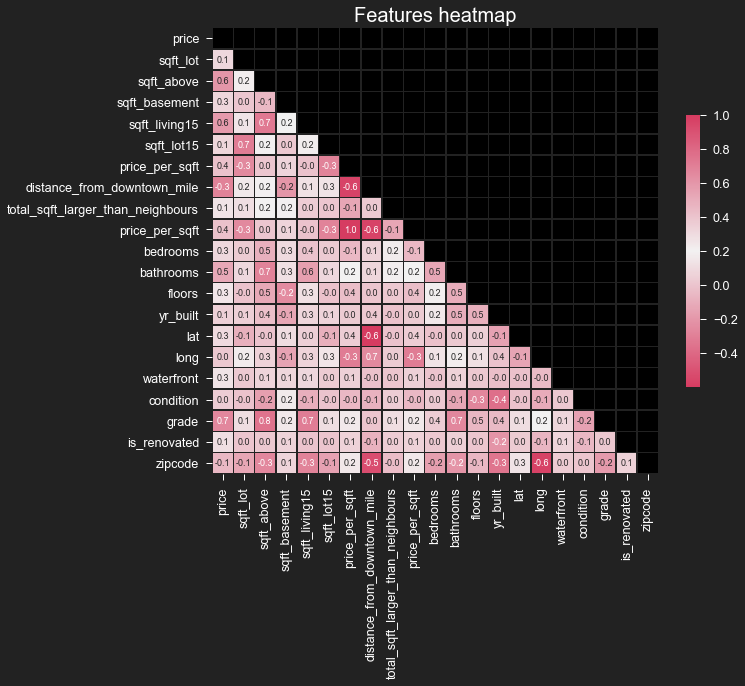

In [64]:
heatmap_DataFrame(df_model)

## Exploring features

### Individually

#### Price

In [111]:
# df_model['price'].describe().to_frame().style.format("{0:,.0f}")

In [112]:
# sns.histplot(data=df_model.price,
#              bins=30,
#              color='silver',
#              kde=True,
#              stat="probability",
#              cumulative=True);

In [113]:
# sns.histplot(data=df_model.price,
#              bins=30,
#              color='silver',
#              kde=True,
#              stat="probability");

##### probplot plot

In [114]:
# # with supressing warning of N>5000
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     feature_prob_details(df_model.price)

In [115]:
# fig, ax = plt.subplots()
# ax = slope, intercept, r = stats.probplot(df_model['price'],
#                                           dist="norm",
#                                           fit=True,
#                                           plot=plt)[1]
# print(
#     f'Slope: {round(slope,2)}, Intercept: {round(intercept,2)}, r_sq: {round(r**2,4)}'
# )

#### View

### check the distribution of the features

In [116]:
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     for column in df_model:
#         print(f'{"="*180}')
#         feature_prob_details(df_model[column])
#         print(f'{"="*180}')
#         plt.show()

### check the linearity of the features

In [117]:
df_model

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_per_sqft,distance_from_downtown_mile,total_sqft_larger_than_neighbours,price_per_sqft,bedrooms,bathrooms,floors,yr_built,lat,long,waterfront,condition,grade,is_renovated,zipcode
0,221900.0,5650,1180,0,1340,5650,32.49,7.43,0,32.49,3,1.00,1.0,1955,47.5112,-122.257,0,3,7,0,98178
1,538000.0,7242,2170,400,1690,7639,54.83,7.95,1,54.83,3,2.25,2.0,1951,47.7210,-122.319,0,3,7,1,98125
2,180000.0,10000,770,0,2720,8062,16.71,10.19,0,16.71,2,1.00,1.0,1933,47.7379,-122.233,0,3,6,0,98028
3,604000.0,5000,1050,910,1360,5000,86.78,6.54,1,86.78,4,3.00,1.0,1965,47.5208,-122.393,0,5,7,0,98136
4,510000.0,8080,1680,0,1800,7503,52.25,13.38,1,52.25,3,2.00,1.0,1987,47.6168,-122.045,0,3,8,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,360000.0,1131,1530,0,1530,1509,135.29,6.46,0,135.29,3,2.50,3.0,2009,47.6993,-122.346,0,3,8,0,98103
21415,400000.0,5813,2310,0,1830,7200,49.24,6.74,0,49.24,4,2.50,2.0,2014,47.5107,-122.362,0,3,8,0,98146
21416,402101.0,1350,1020,0,1020,2007,169.66,1.74,0,169.66,2,0.75,2.0,2009,47.5944,-122.299,0,3,7,0,98144
21417,400000.0,2388,1600,0,1410,1287,100.30,13.22,1,100.30,3,2.50,2.0,2004,47.5345,-122.069,0,3,8,0,98027


In [118]:
# for column in df_model.drop(columns=['price_per_sqft','price']):
#     print(column)
#     sns.lmplot(y='price',x=column,data=df_model,ci=68).set_titles('ok')
#     plt.show()

ValueError: Shape of passed values is (2, 2), indices imply (21419, 2)

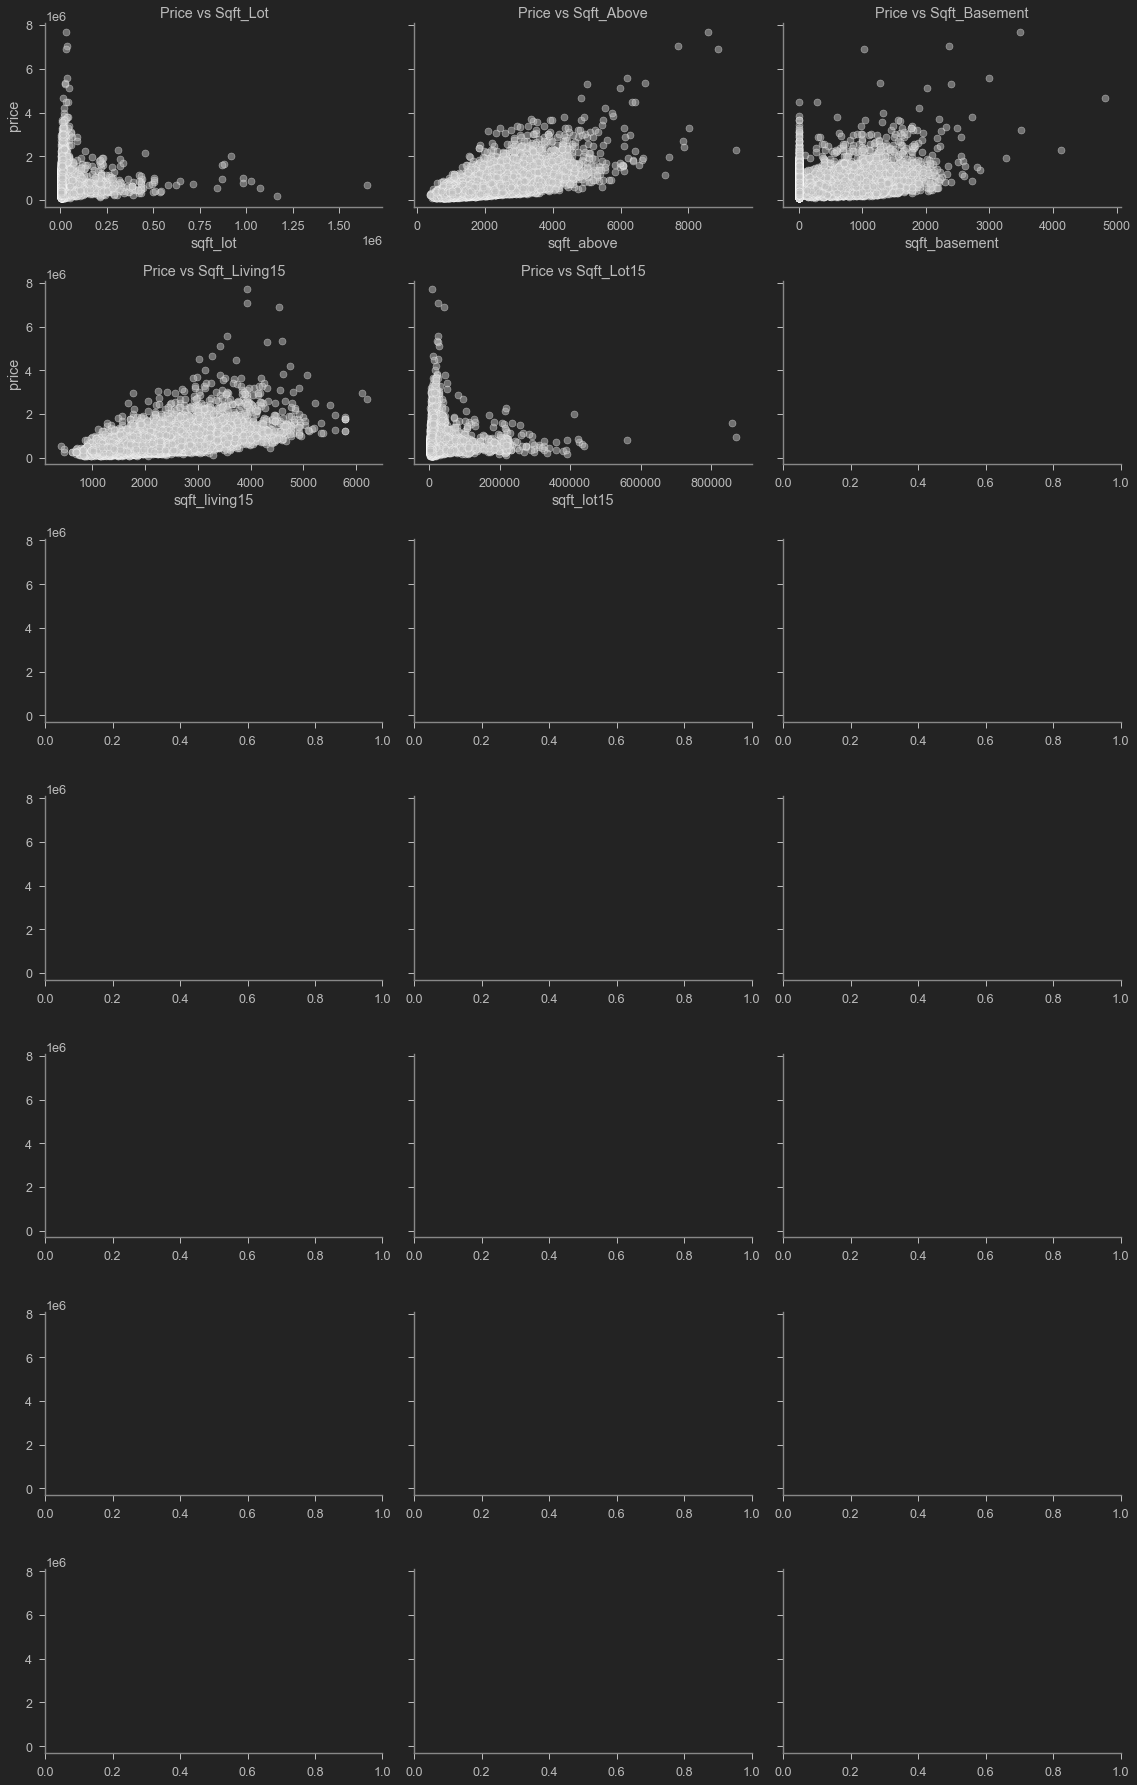

In [70]:
test_for_linearity(df_model)

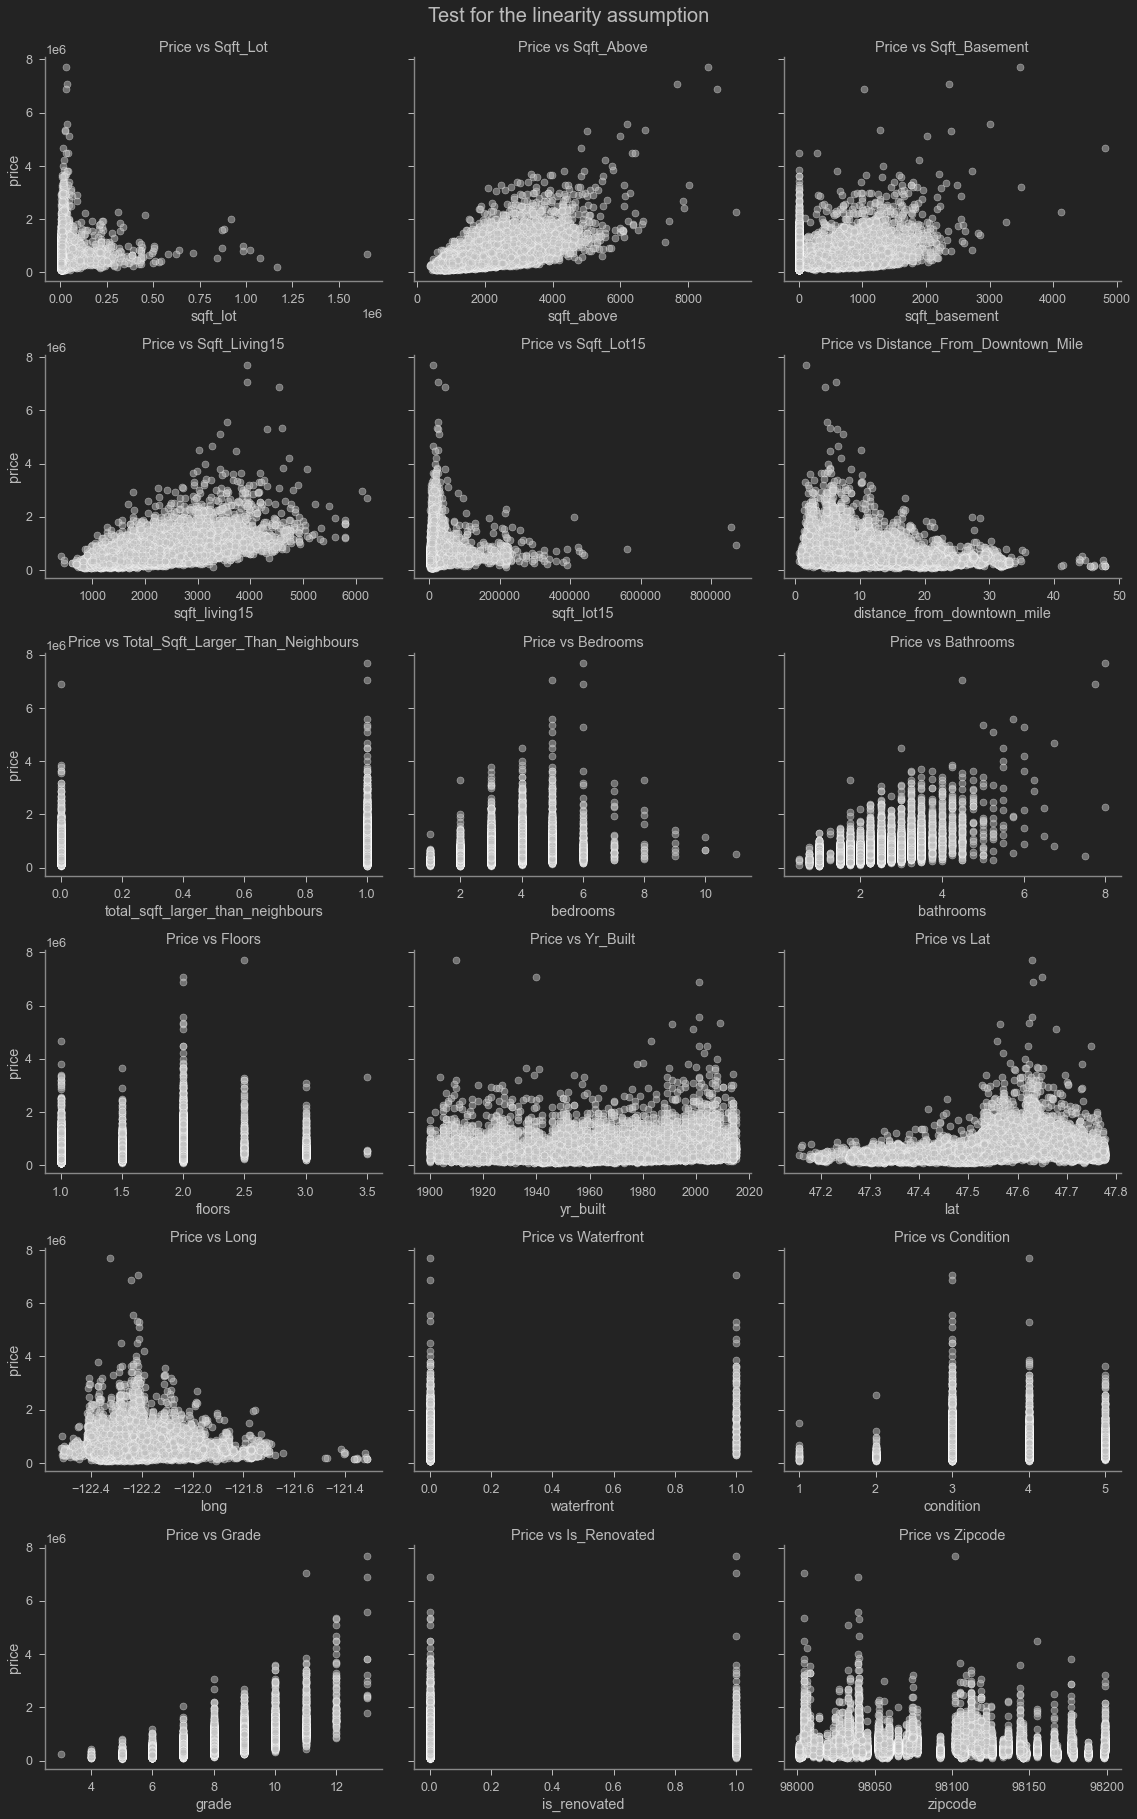

In [120]:
test_for_linearity(df_model.drop(columns='price_per_sqft'))

### Check the normality assumptions

formula: price ~ price
Regression Analysis and Diagnostics for Price with price
Plot 1 of 21
------------------------------------------------------------------------------------------


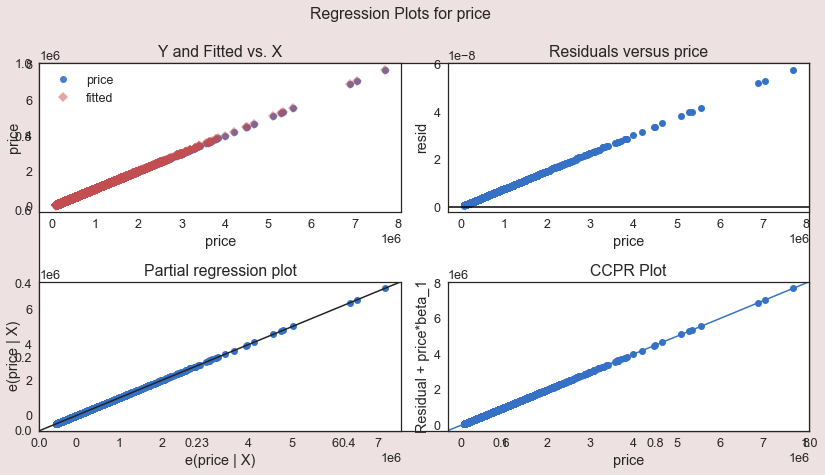

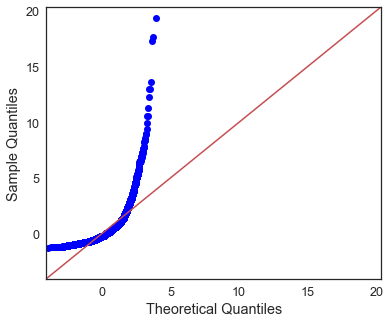

formula: price ~ sqft_lot
Regression Analysis and Diagnostics for Price with sqft_lot
Plot 2 of 21
------------------------------------------------------------------------------------------


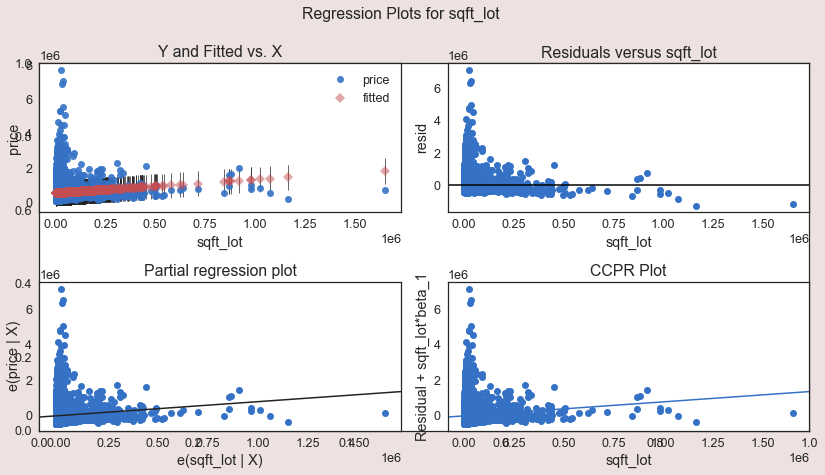

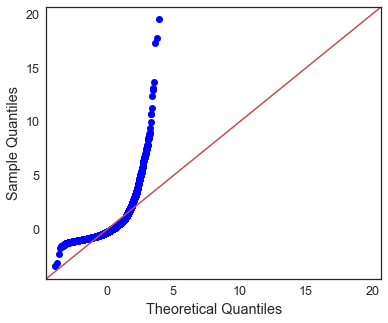

formula: price ~ sqft_above
Regression Analysis and Diagnostics for Price with sqft_above
Plot 3 of 21
------------------------------------------------------------------------------------------


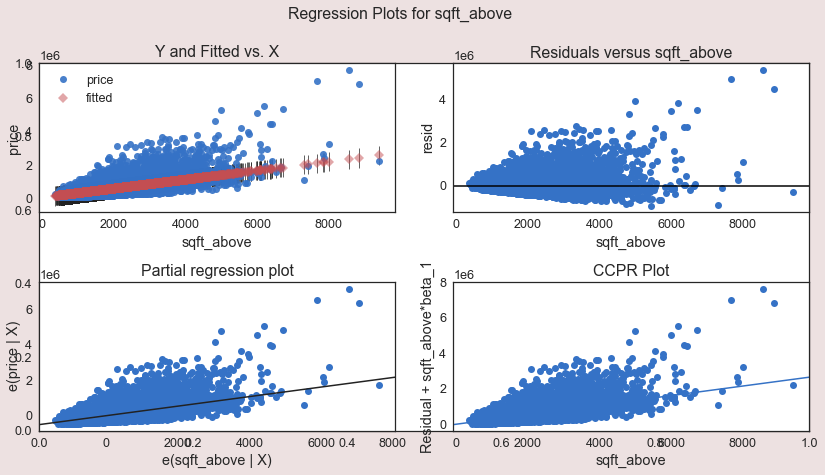

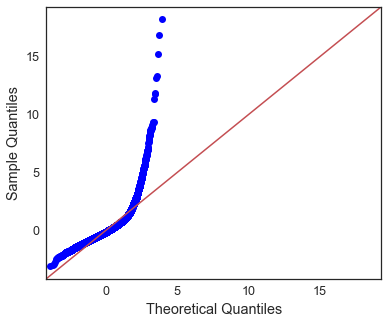

formula: price ~ sqft_basement
Regression Analysis and Diagnostics for Price with sqft_basement
Plot 4 of 21
------------------------------------------------------------------------------------------


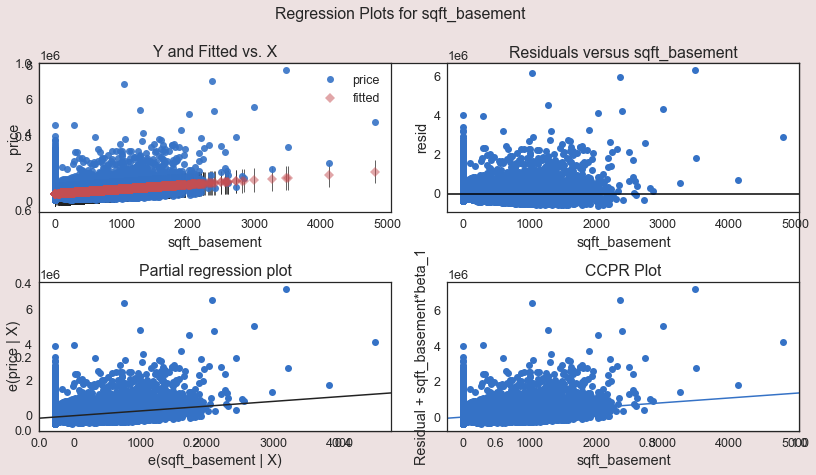

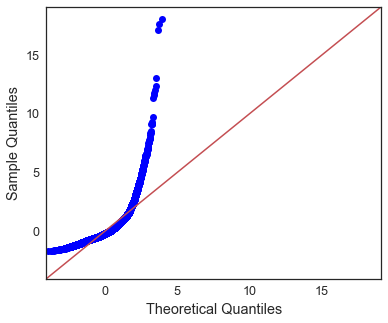

formula: price ~ sqft_living15
Regression Analysis and Diagnostics for Price with sqft_living15
Plot 5 of 21
------------------------------------------------------------------------------------------


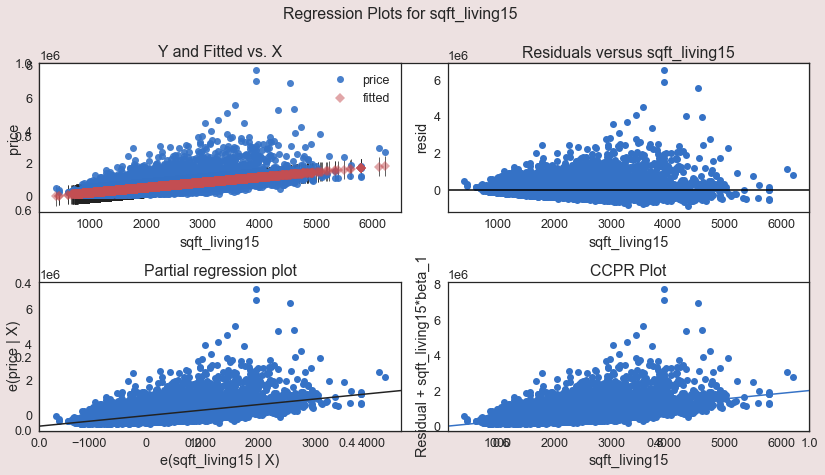

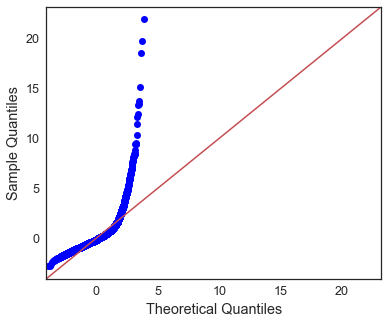

formula: price ~ sqft_lot15
Regression Analysis and Diagnostics for Price with sqft_lot15
Plot 6 of 21
------------------------------------------------------------------------------------------


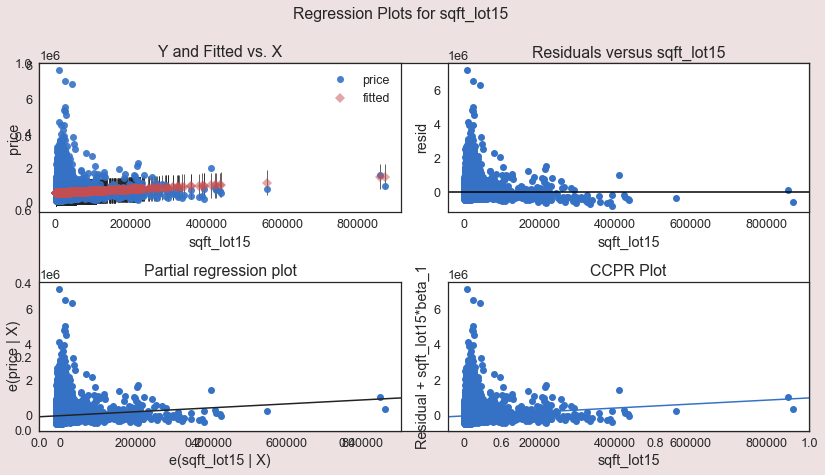

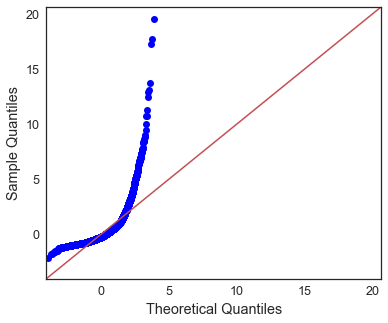

formula: price ~ price_per_sqft
Regression Analysis and Diagnostics for Price with price_per_sqft
Plot 7 of 21
------------------------------------------------------------------------------------------


ValueError: 'price_per_sqft' is not in list

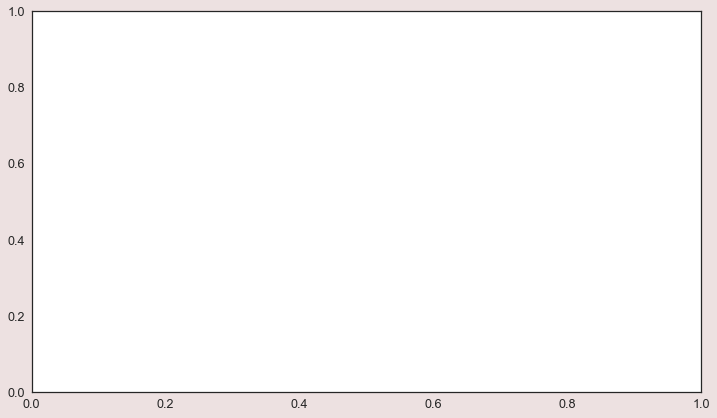

In [109]:
with plt.style.context('seaborn-white'):
    stat_list = []
    for idx, column in enumerate(df_model.columns):
        regression_target = 'price'
        if column in categorical_feat_model:
            print(f'formula for regression: {f}')
            print(
                f"Regression Analysis and Diagnostics for Price with {column}")
            print(f'Plot {idx+1} of {len(df_model.columns)}')
            print(f'{"-"*90}')

            temp_df = df_model.copy()
            temp_df = temp_df[[regression_target, column]]

            f = f'{regression_target} ~ C({column})'
            f_for_plot = f'{regression_target} ~ {column}'

            model = smf.ols(formula=f, data=temp_df).fit()
            model_for_plot = smf.ols(formula=f_for_plot, data=temp_df).fit()

            fig, axes = plt.subplots(figsize=(12, 7),
                                     facecolor='#ede1e1',
                                     edgecolor='red')
            fig = sm.graphics.plot_regress_exog(model_for_plot,
                                                column,
                                                fig=fig)
            fig.tight_layout()

            sm.graphics.qqplot(model_for_plot.resid,
                               dist=stats.norm,
                               line='45',
                               fit=True).set_size_inches(6, 5)

            temp_dict = {
                'name': column,
                'r_sq': model.rsquared,
                'intercept': model.params[0],
                'beta': model.params[1],
                'p_val': model.pvalues[1],
                'Jarque-Bera': sms.jarque_bera(model.resid)[0]
            }
            stat_list.append(temp_dict)
            plt.show()
        if column in numerical_feat_model:
            f = f'{regression_target} ~ {column}'
            print(f'formula: {f}')
            print(
                f"Regression Analysis and Diagnostics for Price with {column}")
            print(f'Plot {idx+1} of {len(df_model.columns)}')
            print(f'{"-"*90}')
            model = smf.ols(formula=f, data=df_model).fit()

            fig, axes = plt.subplots(figsize=(12, 7),
                                     facecolor='#ede1e1',
                                     edgecolor='red')
            fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
            fig.tight_layout()

            sm.graphics.qqplot(model.resid,
                               dist=stats.norm,
                               line='45',
                               fit=True).set_size_inches(6, 5)

            temp_dict = {
                'name': column,
                'r_sq': model.rsquared,
                'intercept': model.params[0],
                'beta': model.params[1],
                'p_val': model.pvalues[1],
                'Jarque-Bera': sms.jarque_bera(model.resid)[0]
            }
            stat_list.append(temp_dict)
            plt.show()

### Cherrypicked pairs 

#### Price VS Year Built

In [61]:
# sns.jointplot(x='price',y='yr_built',data=df_model);

In [62]:
# price_vs_year_built()

#### Price VS Bedroom Count

In [63]:
# sns.jointplot(x='price',y='bedrooms',data=df_model);

In [64]:
# price_vs_bedroom_count()

### Location

#### House Location

In [65]:
# get_location_static()

In [66]:
# # to get a interactive version of this uncomment this and run
# get_location_interactive()

#### Average Price by Zipcode

In [67]:
# # grouping by zipcode and aggregating by average price
# df_mean_price_by_zip = df.groupby(by='zipcode').mean().reset_index()
# df_mean_price_by_zip[['zipcode', 'price'
#                       ]].sort_values(by='price',
#                                      ascending=False).reset_index(drop='index')

In [68]:
# average_price_by_zipcode_static()

In [69]:
# # to get a interactive version of this uncomment this and run
# average_price_by_zipcode_interactive()

In [182]:
df_mean_price_per_sqft_by_zip = df.groupby(by='zipcode').mean().reset_index()[[
    'zipcode', 'price_per_sqft'
]].sort_values(by='price_per_sqft', ascending=False).reset_index(drop='index')
df_mean_price_per_sqft_by_zip

,zipcode,price_per_sqft
0,98102,173.003942
1,98119,161.332989
2,98109,160.549817
3,98112,152.387873
4,98107,137.061856
...,...,...
65,98010,18.455051
66,98022,18.301974
67,98014,15.488130
68,98024,14.706456


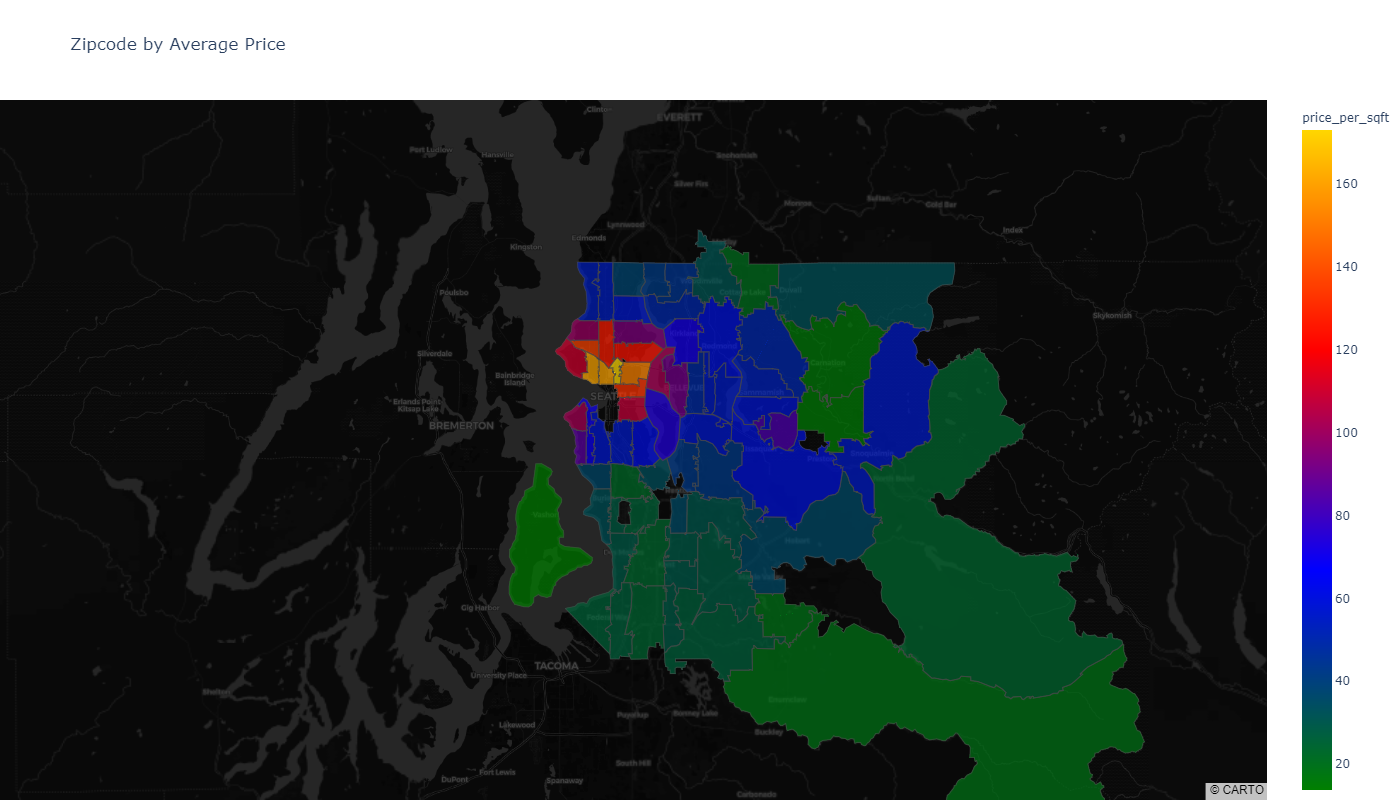

In [184]:
# average_price_by_zipcode_static()

# Regression

### Initial simple OLS

#### On all data

Dependent variable is price. A list of features were regressed. That list is:
```python
for_simple_ols = ['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'price_per_sqft_lot', 'price_per_sqft_living', 'bedrooms',
       'bathrooms', 'floors', 'yr_built', 'lat', 'long', 'waterfront',
       'condition', 'grade', 'is_renovated', 'zipcode']
```

In [71]:
# # Data from calucation for checking normality assumption code
# df_stat = pd.DataFrame(stat_list)
# df_stat.sort_values(by='r_sq',ascending=False).style.set_precision(4).set_properties(**{'color': 'lawngreen'})

### initial Multiple OLS

#### Whole DataFrame

In [72]:
print(
    f"Independents variables: {list(df_model.columns)}\nDependant variable: '{df_model.price.name}'\n\n"
)
# another look at the features
print('categorical features:', categorical_feat_model)
print('numerical features:', numerical_feat_model)

Independents variables: ['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price_per_sqft_lot', 'price_per_sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'lat', 'long', 'waterfront', 'condition', 'grade', 'is_renovated', 'zipcode']
Dependant variable: 'price'


categorical features: ['waterfront', 'condition', 'grade', 'is_renovated', 'zipcode']
numerical features: ['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price_per_sqft_lot', 'price_per_sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'lat', 'long']


MODEL # 1

Dropped Features: ['price_per_sqft_lot', 'price_per_sqft_living']
Formula for regression: price ~ sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + yr_built + lat + long + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1053.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:58:22   Log-Likelihood:            -2.8617e+05
No. Observations:               21419   AIC:                         5.725e+05
Df Residuals:                   21322   BIC:                         5.733e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.458e+07   5.91e+06     -5.851      0.000   -4.62e+07    -2.3e+07
C(waterfront)[T.1]    8.205e+05   1.33e+04     61.842      0.000    7.94e+05    8.46e+05
C(condition)[T.2]     8.973e+04   3.17e+04      2.835      0.005    2.77e+04    1.52e+05
C(condition)[T.3]     1.062e+05   2.94e+04      3.611      0.000    4.85e+04    1.64e+05
C(condition)[T.4]      1.35e+05   2.94e+04      4.588      0.000    7.73e+04    1.93e+05
C(condition)[T.5]      1.78e+05   2.96e+04      6.014      0.000     1.2e+05    2.36e+05
C(grade)[T.4]        -7.913e+04   1.57e+05     -0.504      0.615   -3.87e+05    2.29e+05
C(grade)[T.5]        -1.234e+05   1.55e+05     -0.798      0.425   -4.26e+05     1.8e+05
C(grade)[T.6]        -1.261e+05   1.54e+05     -0.817      0.414   -4.29e+05    1.76e+05
C(grade)[T.7]         -1.21e+05   1.54e+05     -0.784      0.433   -4.24e+05    1.81e+05
C(grade)[T.8]        -9.193e+04   1.54e+05     -0.596      0.552   -3.95e+05    2.11e+05
C(grade)[T.9]        -1.171e+04   1.54e+05     -0.076      0.940   -3.14e+05    2.91e+05
C(grade)[T.10]        1.147e+05   1.55e+05      0.742      0.458   -1.88e+05    4.18e+05
C(grade)[T.11]          3.2e+05   1.55e+05      2.068      0.039    1.67e+04    6.23e+05
C(grade)[T.12]        7.501e+05   1.56e+05      4.821      0.000    4.45e+05    1.06e+06
C(grade)[T.13]        1.866e+06   1.61e+05     11.604      0.000    1.55e+06    2.18e+06
C(is_renovated)[T.1]  6.507e+04   6169.710     10.546      0.000     5.3e+04    7.72e+04
C(zipcode)[T.98002]   1.999e+04   1.39e+04      1.434      0.152   -7327.625    4.73e+04
C(zipcode)[T.98003]  -1.353e+04   1.25e+04     -1.085      0.278    -3.8e+04    1.09e+04
C(zipcode)[T.98004]   7.096e+05   2.26e+04     31.370      0.000    6.65e+05    7.54e+05
C(zipcode)[T.98005]   2.544e+05   2.42e+04     10.530      0.000    2.07e+05    3.02e+05
C(zipcode)[T.98006]   2.309e+05   1.98e+04     11.676      0.000    1.92e+05     2.7e+05
C(zipcode)[T.98007]   2.153e+05    2.5e+04      8.615      0.000    1.66e+05    2.64e+05
C(zipcode)[T.98008]   2.498e+05   2.37e+04     10.549      0.000    2.03e+05    2.96e+05
C(zipcode)[T.98010]   1.109e+05   2.12e+04      5.228      0.000    6.93e+04    1.52e+05
C(zipcode)[T.98011]   6.259e+04   3.08e+04      2.031      0.042    2184.988    1.23e+05
C(zipcode)[T.98014]   1.237e+05   3.39e+04      3.653      0.000    5.73e+04     1.9e+05
C(zipcode)[T.98019]   8.568e+04   3.34e+04      2.567      0.010    2.03e+04    1.51e+05
C(zipcode)[T.98022]   8.954e+04   1.84e+04      4.863      0.000    5.35e+04    1.26e+05
C(zipcode)[T.98023]  -5.453e+04   1.15e+04     -4.755      0.000    -7.7e+04   -3.21e+04
C(zipcode)[T.98024]   1.882e+05   2.98e+04      6.312      0.000     1.3e+05    2.47e+05
C(zipcode)[T.98027]   1.686e+05   2.03e+04      8.319    

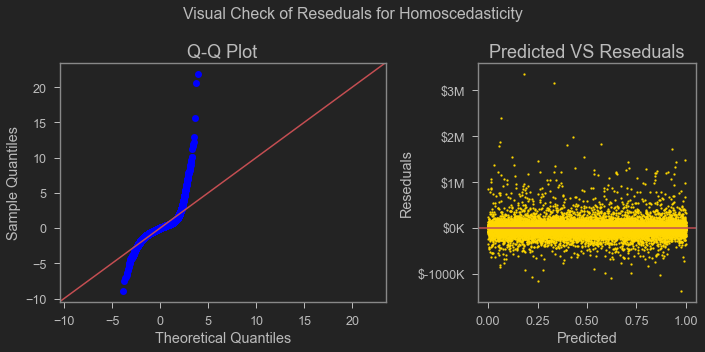

In [117]:
x1 = OLS_sm(df=df_model,
            target='price',
            drop=['price_per_sqft_lot', 'price_per_sqft_living'],
            verbose=True,
            show_summary=True);

In [118]:
print(
    f'Model 1: r-sq value is {x1.rsquared.round(4)}, and adj.r-sq value is {x1.rsquared_adj.round(4)}'
)

Model 1: r-sq value is 0.8259, and adj.r-sq value is 0.8251


In [119]:
check_for_high_p_val(x1)

,features,p_values
0,C(grade)[T.4],0.6145
1,C(grade)[T.5],0.4249
2,C(grade)[T.6],0.4139
3,C(grade)[T.7],0.4329
4,C(grade)[T.8],0.5515
5,C(grade)[T.9],0.9396
6,C(grade)[T.10],0.4580
7,C(zipcode)[T.98002],0.1515
8,C(zipcode)[T.98003],0.2778
9,C(zipcode)[T.98028],0.0501


MODEL # 2 

Dropped Features: ['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long']
Formula for regression: price ~ sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + yr_built + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1074.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:00:07   Log-Likelihood:            -2.8619e+05
No. Observations:               21419   AIC:                         5.726e+05
Df Residuals:                   21324   BIC:                         5.733e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             8.431e+05   1.98e+05      4.251      0.000    4.54e+05    1.23e+06
C(waterfront)[T.1]    8.216e+05   1.33e+04     61.933      0.000    7.96e+05    8.48e+05
C(condition)[T.2]      8.98e+04   3.17e+04      2.835      0.005    2.77e+04    1.52e+05
C(condition)[T.3]     1.063e+05   2.94e+04      3.612      0.000    4.86e+04    1.64e+05
C(condition)[T.4]     1.347e+05   2.94e+04      4.575      0.000     7.7e+04    1.92e+05
C(condition)[T.5]     1.778e+05   2.96e+04      6.003      0.000     1.2e+05    2.36e+05
C(grade)[T.4]        -7.879e+04   1.57e+05     -0.501      0.616   -3.87e+05    2.29e+05
C(grade)[T.5]        -1.236e+05   1.55e+05     -0.798      0.425   -4.27e+05     1.8e+05
C(grade)[T.6]        -1.242e+05   1.54e+05     -0.804      0.421   -4.27e+05    1.79e+05
C(grade)[T.7]        -1.186e+05   1.54e+05     -0.768      0.442   -4.21e+05    1.84e+05
C(grade)[T.8]        -8.899e+04   1.54e+05     -0.576      0.565   -3.92e+05    2.14e+05
C(grade)[T.9]        -8926.9530   1.55e+05     -0.058      0.954   -3.12e+05    2.94e+05
C(grade)[T.10]        1.173e+05   1.55e+05      0.758      0.448   -1.86e+05     4.2e+05
C(grade)[T.11]        3.237e+05   1.55e+05      2.090      0.037    2.01e+04    6.27e+05
C(grade)[T.12]        7.515e+05   1.56e+05      4.826      0.000    4.46e+05    1.06e+06
C(grade)[T.13]        1.869e+06   1.61e+05     11.613      0.000    1.55e+06    2.18e+06
C(is_renovated)[T.1]   6.47e+04   6173.882     10.479      0.000    5.26e+04    7.68e+04
C(zipcode)[T.98002]   7364.2776   1.37e+04      0.537      0.591   -1.95e+04    3.43e+04
C(zipcode)[T.98003]  -3888.1027   1.24e+04     -0.314      0.753   -2.81e+04    2.03e+04
C(zipcode)[T.98004]   7.476e+05   1.21e+04     61.837      0.000    7.24e+05    7.71e+05
C(zipcode)[T.98005]   2.833e+05   1.46e+04     19.452      0.000    2.55e+05    3.12e+05
C(zipcode)[T.98006]   2.459e+05    1.1e+04     22.439      0.000    2.24e+05    2.67e+05
C(zipcode)[T.98007]   2.384e+05   1.55e+04     15.419      0.000    2.08e+05    2.69e+05
C(zipcode)[T.98008]   2.674e+05   1.23e+04     21.690      0.000    2.43e+05    2.92e+05
C(zipcode)[T.98010]   5.561e+04   1.76e+04      3.162      0.002    2.11e+04    9.01e+04
C(zipcode)[T.98011]   1.236e+05   1.38e+04      8.980      0.000    9.66e+04    1.51e+05
C(zipcode)[T.98014]   9.361e+04   1.64e+04      5.705      0.000    6.15e+04    1.26e+05
C(zipcode)[T.98019]    8.95e+04   1.39e+04      6.437      0.000    6.22e+04    1.17e+05
C(zipcode)[T.98022]   1.234e+04   1.31e+04      0.939      0.348   -1.34e+04    3.81e+04
C(zipcode)[T.98023]  -3.393e+04   1.07e+04     -3.162      0.002    -5.5e+04   -1.29e+04
C(zipcode)[T.98024]   1.513e+05   1.94e+04      7.799      0.000    1.13e+05    1.89e+05
C(zipcode)[T.98027]   1.546e+05   1.12e+04     13.762    

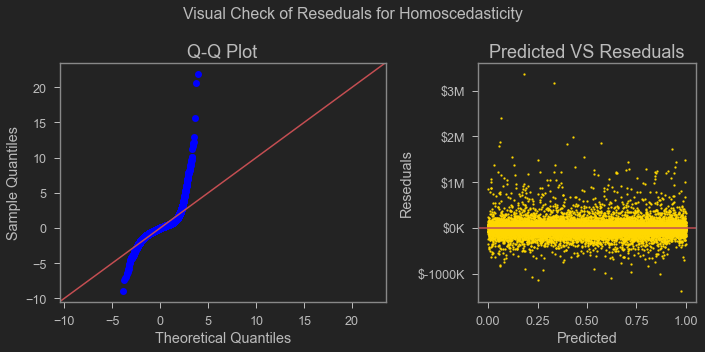

In [120]:
x2 = OLS_sm(
    df=df_model,
    target='price',
    drop=['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long'],
    verbose=True,
    show_summary=True)

In [121]:
check_for_high_p_val(x2)

,features,p_values
0,C(grade)[T.4],0.6164
1,C(grade)[T.5],0.4246
2,C(grade)[T.6],0.4213
3,C(grade)[T.7],0.4425
4,C(grade)[T.8],0.5646
5,C(grade)[T.9],0.9539
6,C(grade)[T.10],0.4483
7,C(zipcode)[T.98002],0.5915
8,C(zipcode)[T.98003],0.7531
9,C(zipcode)[T.98022],0.3478


MODEL # 2

Dropped Features: ['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long', 'grade']
Formula for regression: price ~ sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + yr_built + C(waterfront) + C(condition) + C(is_renovated) + C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     941.2
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:00:37   Log-Likelihood:            -2.8830e+05
No. Observations:               21419   AIC:                         5.768e+05
Df Residuals:                   21334   BIC:                         5.775e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.989e+05   1.32e+05      2.270      0.023    4.08e+04    5.57e+05
C(waterfront)[T.1]    8.652e+05   1.46e+04     59.288      0.000    8.37e+05    8.94e+05
C(condition)[T.2]     1.022e+05   3.49e+04      2.931      0.003    3.39e+04    1.71e+05
C(condition)[T.3]     1.117e+05   3.23e+04      3.455      0.001    4.83e+04    1.75e+05
C(condition)[T.4]     1.347e+05   3.23e+04      4.168      0.000    7.13e+04    1.98e+05
C(condition)[T.5]     1.749e+05   3.25e+04      5.380      0.000    1.11e+05    2.39e+05
C(is_renovated)[T.1]  5.207e+04   6787.253      7.671      0.000    3.88e+04    6.54e+04
C(zipcode)[T.98002]   2.045e+04   1.51e+04      1.352      0.176   -9190.226    5.01e+04
C(zipcode)[T.98003]   4104.9724   1.36e+04      0.301      0.763   -2.26e+04    3.08e+04
C(zipcode)[T.98004]    7.91e+05   1.33e+04     59.505      0.000    7.65e+05    8.17e+05
C(zipcode)[T.98005]   3.132e+05    1.6e+04     19.561      0.000    2.82e+05    3.45e+05
C(zipcode)[T.98006]    2.99e+05    1.2e+04     24.853      0.000    2.75e+05    3.23e+05
C(zipcode)[T.98007]   2.616e+05    1.7e+04     15.365      0.000    2.28e+05    2.95e+05
C(zipcode)[T.98008]   2.782e+05   1.36e+04     20.493      0.000    2.52e+05    3.05e+05
C(zipcode)[T.98010]   5.335e+04   1.94e+04      2.751      0.006    1.53e+04    9.14e+04
C(zipcode)[T.98011]   1.125e+05   1.52e+04      7.411      0.000    8.28e+04    1.42e+05
C(zipcode)[T.98014]   8.827e+04   1.81e+04      4.884      0.000    5.28e+04    1.24e+05
C(zipcode)[T.98019]   6.537e+04   1.53e+04      4.264      0.000    3.53e+04    9.54e+04
C(zipcode)[T.98022]   9337.1465   1.45e+04      0.645      0.519   -1.91e+04    3.77e+04
C(zipcode)[T.98023]  -2.517e+04   1.18e+04     -2.129      0.033   -4.83e+04   -1999.066
C(zipcode)[T.98024]   1.441e+05   2.14e+04      6.733      0.000    1.02e+05    1.86e+05
C(zipcode)[T.98027]   1.674e+05   1.24e+04     13.526      0.000    1.43e+05    1.92e+05
C(zipcode)[T.98028]   1.245e+05   1.36e+04      9.186      0.000    9.79e+04    1.51e+05
C(zipcode)[T.98029]   2.265e+05   1.32e+04     17.216      0.000    2.01e+05    2.52e+05
C(zipcode)[T.98030]  -1407.3948    1.4e+04     -0.101      0.920   -2.88e+04     2.6e+04
C(zipcode)[T.98031]   1.166e+04   1.37e+04      0.851      0.395   -1.52e+04    3.85e+04
C(zipcode)[T.98032]   2.088e+04   1.78e+04      1.174      0.241    -1.4e+04    5.58e+04
C(zipcode)[T.98033]   3.832e+05   1.22e+04     31.427      0.000    3.59e+05    4.07e+05
C(zipcode)[T.98034]   2.149e+05   1.16e+04     18.548      0.000    1.92e+05    2.38e+05
C(zipcode)[T.98038]   1.079e+04   1.15e+04      0.942      0.346   -1.17e+04    3.32e+04
C(zipcode)[T.98039]   1.333e+06   2.61e+04     50.985      0.000    1.28e+06    1.38e+06
C(zipcode)[T.98040]   5.458e+05   1.38e+04     39.559    

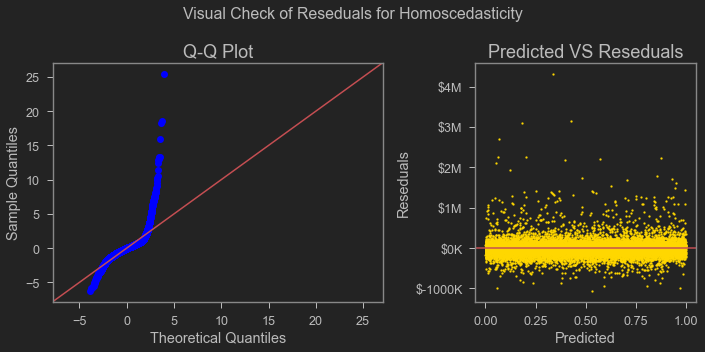

In [122]:
## Reasoning for droping
# price is target
# 'price_per_sqft_lot','price_per_sqft_living', - possible information leakage, i.e. multicolinearity.
# lat, long - already captured in the zipcode variable
x4 = OLS_sm(
    df=df_model,
    target='price',
    drop=['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long','grade'],
    verbose=True,
    show_summary=True)

In [123]:
print(
    f'Model 2: r-sq value is {x4.rsquared.round(4)}, and adj.r-sq value is {x4.rsquared_adj.round(4)}'
)

Model 2: r-sq value is 0.7875, and adj.r-sq value is 0.7867


In [ ]:
check_for_high_p_val

MODEL # 3

Dropped Features: ['price_per_sqft_lot', 'price_per_sqft_living']
Formula for regression: price ~ sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + yr_built + lat + long + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1053.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:47:28   Log-Likelihood:            -2.8617e+05
No. Observations:               21419   AIC:                         5.725e+05
Df Residuals:                   21322   BIC:                         5.733e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.458e+07   5.91e+06     -5.851      0.000   -4.62e+07    -2.3e+07
C(waterfront)[T.1]    8.205e+05   1.33e+04     61.842      0.000    7.94e+05    8.46e+05
C(condition)[T.2]     8.973e+04   3.17e+04      2.835      0.005    2.77e+04    1.52e+05
C(condition)[T.3]     1.062e+05   2.94e+04      3.611      0.000    4.85e+04    1.64e+05
C(condition)[T.4]      1.35e+05   2.94e+04      4.588      0.000    7.73e+04    1.93e+05
C(condition)[T.5]      1.78e+05   2.96e+04      6.014      0.000     1.2e+05    2.36e+05
C(grade)[T.4]        -7.913e+04   1.57e+05     -0.504      0.615   -3.87e+05    2.29e+05
C(grade)[T.5]        -1.234e+05   1.55e+05     -0.798      0.425   -4.26e+05     1.8e+05
C(grade)[T.6]        -1.261e+05   1.54e+05     -0.817      0.414   -4.29e+05    1.76e+05
C(grade)[T.7]         -1.21e+05   1.54e+05     -0.784      0.433   -4.24e+05    1.81e+05
C(grade)[T.8]        -9.193e+04   1.54e+05     -0.596      0.552   -3.95e+05    2.11e+05
C(grade)[T.9]        -1.171e+04   1.54e+05     -0.076      0.940   -3.14e+05    2.91e+05
C(grade)[T.10]        1.147e+05   1.55e+05      0.742      0.458   -1.88e+05    4.18e+05
C(grade)[T.11]          3.2e+05   1.55e+05      2.068      0.039    1.67e+04    6.23e+05
C(grade)[T.12]        7.501e+05   1.56e+05      4.821      0.000    4.45e+05    1.06e+06
C(grade)[T.13]        1.866e+06   1.61e+05     11.604      0.000    1.55e+06    2.18e+06
C(is_renovated)[T.1]  6.507e+04   6169.710     10.546      0.000     5.3e+04    7.72e+04
C(zipcode)[T.98002]   1.999e+04   1.39e+04      1.434      0.152   -7327.625    4.73e+04
C(zipcode)[T.98003]  -1.353e+04   1.25e+04     -1.085      0.278    -3.8e+04    1.09e+04
C(zipcode)[T.98004]   7.096e+05   2.26e+04     31.370      0.000    6.65e+05    7.54e+05
C(zipcode)[T.98005]   2.544e+05   2.42e+04     10.530      0.000    2.07e+05    3.02e+05
C(zipcode)[T.98006]   2.309e+05   1.98e+04     11.676      0.000    1.92e+05     2.7e+05
C(zipcode)[T.98007]   2.153e+05    2.5e+04      8.615      0.000    1.66e+05    2.64e+05
C(zipcode)[T.98008]   2.498e+05   2.37e+04     10.549      0.000    2.03e+05    2.96e+05
C(zipcode)[T.98010]   1.109e+05   2.12e+04      5.228      0.000    6.93e+04    1.52e+05
C(zipcode)[T.98011]   6.259e+04   3.08e+04      2.031      0.042    2184.988    1.23e+05
C(zipcode)[T.98014]   1.237e+05   3.39e+04      3.653      0.000    5.73e+04     1.9e+05
C(zipcode)[T.98019]   8.568e+04   3.34e+04      2.567      0.010    2.03e+04    1.51e+05
C(zipcode)[T.98022]   8.954e+04   1.84e+04      4.863      0.000    5.35e+04    1.26e+05
C(zipcode)[T.98023]  -5.453e+04   1.15e+04     -4.755      0.000    -7.7e+04   -3.21e+04
C(zipcode)[T.98024]   1.882e+05   2.98e+04      6.312      0.000     1.3e+05    2.47e+05
C(zipcode)[T.98027]   1.686e+05   2.03e+04      8.319    

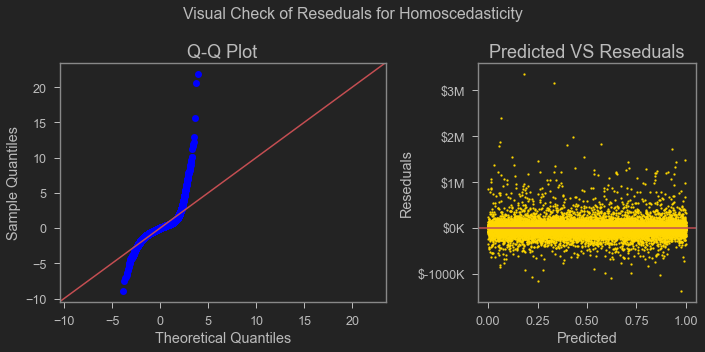

In [108]:
x3 = OLS_sm(df=df_model,
            target='price',
            drop=['price_per_sqft_lot', 'price_per_sqft_living'],
            verbose=True,
            show_summary=True)

In [75]:
print(
    f'Model 3: r-sq value is {x3.rsquared.round(4)}, and adj.r-sq value is {x3.rsquared_adj.round(4)}'
)

Model 3: r-sq value is 0.8259, and adj.r-sq value is 0.8251


## train-test split

### For Statsmodels

In [294]:
df_model_train, df_model_test = train_test_split(df_model,
                                                 test_size=0.3,
                                                 random_state=13)

### For scikit-learn

ONE HOT

In [295]:
categorical_feat_model

['waterfront', 'condition', 'grade', 'is_renovated', 'zipcode']

In [296]:
# # column name with categories
# # only apply on confirmed categorical data

# temp_dict = {}
# for column in df_model[categorical_feat_model]:
# #     print(column)
# #     print(list(df_model[column].value_counts().to_dict().keys()))
#     temp_dict[column] = list(df_model[column].value_counts().to_dict().keys())
# temp_dict

In [297]:
df_model_processed_ohe = pd.get_dummies(df_model,
                              columns=categorical_feat_model,
                              sparse=False,
                              drop_first=True)
df_model_processed_ohe

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_per_sqft_lot,price_per_sqft_living,bedrooms,bathrooms,floors,yr_built,lat,long,waterfront_1,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,is_renovated_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,5650,1180,0,1340,5650,39.274336,188.050847,3,1.00,1.0,1955,47.5112,-122.257,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,7242,2170,400,1690,7639,74.288870,209.338521,3,2.25,2.0,1951,47.7210,-122.319,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,10000,770,0,2720,8062,18.000000,233.766234,2,1.00,1.0,1933,47.7379,-122.233,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,5000,1050,910,1360,5000,120.800000,308.163265,4,3.00,1.0,1965,47.5208,-122.393,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,8080,1680,0,1800,7503,63.118812,303.571429,3,2.00,1.0,1987,47.6168,-122.045,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,360000.0,1131,1530,0,1530,1509,318.302387,235.294118,3,2.50,3.0,2009,47.6993,-122.346,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21416,400000.0,5813,2310,0,1830,7200,68.811285,173.160173,4,2.50,2.0,2014,47.5107,-122.362,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21417,402101.0,1350,1020,0,1020,2007,297.852593,394.216667,2,0.75,2.0,2009,47.5944,-122.299,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21418,400000.0,2388,1600,0,1410,1287,167.504188,250.000000,3,2.50,2.0,2004,47.5345,-122.069,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [298]:
# df_model_ohe = pd.get_dummies(df_model[categorical_feat_model],
#                               prefix=categorical_feat_model,
#                               columns=categorical_feat_model,
#                               sparse=False,
#                               drop_first=True)

In [299]:
# df_model_sans_cate_var = df_model.drop(categorical_feat_model,axis=1)

In [300]:
# df_model_processed_ohe = pd.concat([df_model_sans_cate_var, df_model_ohe], axis=1)
# df_model_processed_ohe

TRANSFORM

Not transforming data or scaling as this will make interpretation hard and model is already in good standing right now.

SPLIT

In [301]:
# Full Sample target variable and independent variables
X = df_model_processed_ohe.drop(['price'], axis = 1).copy()
y = df_model_processed_ohe['price'].copy()

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=13)

#### On train data

based on model # 2 assumptions

##### Statsmodels

Dropped Features: ['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long']
Formula for regression: price ~ sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + yr_built + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     743.8
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:46:30   Log-Likelihood:            -2.0047e+05
No. Observations:               14993   AIC:                         4.011e+05
Df Residuals:                   14898   BIC:                         4.019e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             9.656e+05   2.16e+05      4.464      0.000    5.42e+05    1.39e+06
C(waterfront)[T.1]    8.127e+05   1.55e+04     52.418      0.000    7.82e+05    8.43e+05
C(condition)[T.2]     1.143e+05   3.58e+04      3.195      0.001    4.42e+04    1.84e+05
C(condition)[T.3]     1.267e+05   3.29e+04      3.850      0.000    6.22e+04    1.91e+05
C(condition)[T.4]     1.541e+05   3.29e+04      4.681      0.000    8.96e+04    2.19e+05
C(condition)[T.5]     2.015e+05   3.31e+04      6.081      0.000    1.37e+05    2.66e+05
C(grade)[T.4]        -5.835e+04    1.6e+05     -0.364      0.716   -3.73e+05    2.56e+05
C(grade)[T.5]        -1.103e+05   1.57e+05     -0.704      0.481   -4.17e+05    1.97e+05
C(grade)[T.6]        -1.118e+05   1.56e+05     -0.715      0.475   -4.18e+05    1.95e+05
C(grade)[T.7]        -1.061e+05   1.56e+05     -0.679      0.497   -4.13e+05       2e+05
C(grade)[T.8]        -7.599e+04   1.56e+05     -0.486      0.627   -3.82e+05    2.31e+05
C(grade)[T.9]         2370.9755   1.56e+05      0.015      0.988   -3.04e+05    3.09e+05
C(grade)[T.10]        1.266e+05   1.57e+05      0.809      0.419    -1.8e+05    4.34e+05
C(grade)[T.11]        3.352e+05   1.57e+05      2.136      0.033    2.76e+04    6.43e+05
C(grade)[T.12]        8.127e+05   1.58e+05      5.142      0.000    5.03e+05    1.12e+06
C(grade)[T.13]        1.658e+06   1.66e+05     10.005      0.000    1.33e+06    1.98e+06
C(is_renovated)[T.1]  5.843e+04   7402.664      7.893      0.000    4.39e+04    7.29e+04
C(zipcode)[T.98002]   6132.2076   1.64e+04      0.375      0.708    -2.6e+04    3.82e+04
C(zipcode)[T.98003]  -5169.3621    1.5e+04     -0.344      0.731   -3.46e+04    2.43e+04
C(zipcode)[T.98004]   7.502e+05   1.46e+04     51.357      0.000    7.22e+05    7.79e+05
C(zipcode)[T.98005]   2.845e+05   1.76e+04     16.167      0.000     2.5e+05    3.19e+05
C(zipcode)[T.98006]   2.456e+05   1.33e+04     18.502      0.000     2.2e+05    2.72e+05
C(zipcode)[T.98007]   2.362e+05   1.84e+04     12.805      0.000       2e+05    2.72e+05
C(zipcode)[T.98008]   2.645e+05   1.48e+04     17.858      0.000    2.35e+05    2.94e+05
C(zipcode)[T.98010]   5.486e+04   2.04e+04      2.684      0.007    1.48e+04    9.49e+04
C(zipcode)[T.98011]   1.207e+05   1.67e+04      7.234      0.000     8.8e+04    1.53e+05
C(zipcode)[T.98014]   8.493e+04   1.99e+04      4.276      0.000     4.6e+04    1.24e+05
C(zipcode)[T.98019]   8.629e+04   1.63e+04      5.283      0.000    5.43e+04    1.18e+05
C(zipcode)[T.98022]   1.369e+04   1.61e+04      0.848      0.396    -1.8e+04    4.53e+04
C(zipcode)[T.98023]  -3.533e+04    1.3e+04     -2.715      0.007   -6.08e+04   -9819.605
C(zipcode)[T.98024]   1.462e+05   2.28e+04      6.408      0.000    1.01e+05    1.91e+05
C(zipcode)[T.98027]   1.476e+05   1.37e+04     10.807    

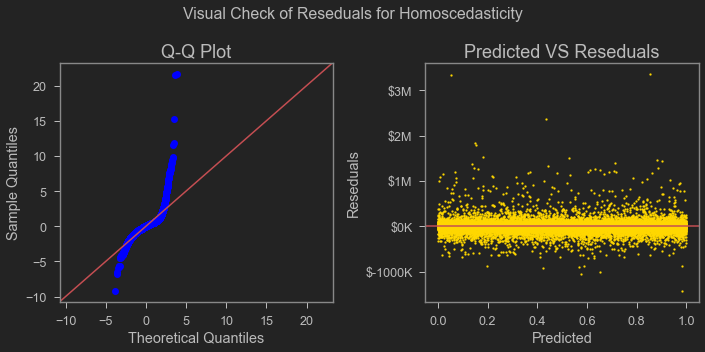

In [303]:
# train data
XX = OLS_sm(
    df_model_train,
    drop=['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long'],
    verbose=True,
    show_summary=True)

In [382]:
check_for_high_p_val(XX,sorted_=False)

,features,p_values
0,C(grade)[T.4],0.7159
1,C(grade)[T.5],0.4815
2,C(grade)[T.6],0.4746
3,C(grade)[T.7],0.4972
4,C(grade)[T.8],0.6270
5,C(grade)[T.9],0.9879
6,C(grade)[T.10],0.4187
7,C(zipcode)[T.98002],0.7080
8,C(zipcode)[T.98003],0.7309
9,C(zipcode)[T.98022],0.3963


drop GRADE

In [338]:
# test data
OLS_sm(df_model_test,
       drop=['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long'],
       verbose=True,
       show_summary=True);

Dropped Features: ['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long']
Formula for regression: price ~ sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + yr_built + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     339.9
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        04:04:24   Log-Likelihood:                -85624.
No. Observations:                6426   AIC:                         1.714e+05
Df Residuals:                    6332   BIC:                         1.721e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.351e+05   2.33e+05      2.294      0.022    7.78e+04    9.92e+05
C(waterfront)[T.1]    8.449e+05   2.59e+04     32.616      0.000    7.94e+05    8.96e+05
C(condition)[T.2]    -9598.7943   7.09e+04     -0.135      0.892   -1.49e+05    1.29e+05
C(condition)[T.3]     1.943e+04   6.74e+04      0.288      0.773   -1.13e+05    1.52e+05
C(condition)[T.4]     5.031e+04   6.75e+04      0.746      0.456    -8.2e+04    1.83e+05
C(condition)[T.5]     8.269e+04   6.77e+04      1.221      0.222   -5.01e+04    2.15e+05
C(grade)[T.5]        -3.722e+04   5.65e+04     -0.659      0.510   -1.48e+05    7.35e+04
C(grade)[T.6]        -3.418e+04   5.39e+04     -0.634      0.526    -1.4e+05    7.15e+04
C(grade)[T.7]        -2.884e+04   5.39e+04     -0.535      0.593   -1.34e+05    7.68e+04
C(grade)[T.8]         -702.6097   5.42e+04     -0.013      0.990   -1.07e+05    1.06e+05
C(grade)[T.9]         8.445e+04   5.48e+04      1.542      0.123   -2.29e+04    1.92e+05
C(grade)[T.10]        2.115e+05   5.56e+04      3.804      0.000    1.03e+05     3.2e+05
C(grade)[T.11]        4.123e+05   5.76e+04      7.160      0.000    2.99e+05    5.25e+05
C(grade)[T.12]         7.06e+05   6.52e+04     10.831      0.000    5.78e+05    8.34e+05
C(grade)[T.13]        2.372e+06   9.77e+04     24.274      0.000    2.18e+06    2.56e+06
C(is_renovated)[T.1]  7.956e+04   1.12e+04      7.087      0.000    5.75e+04    1.02e+05
C(zipcode)[T.98002]   1.186e+04   2.51e+04      0.472      0.637   -3.74e+04    6.11e+04
C(zipcode)[T.98003]    330.2196   2.16e+04      0.015      0.988    -4.2e+04    4.26e+04
C(zipcode)[T.98004]   7.407e+05   2.14e+04     34.588      0.000    6.99e+05    7.83e+05
C(zipcode)[T.98005]   2.778e+05   2.58e+04     10.778      0.000    2.27e+05    3.28e+05
C(zipcode)[T.98006]   2.468e+05   1.93e+04     12.771      0.000    2.09e+05    2.85e+05
C(zipcode)[T.98007]   2.456e+05   2.82e+04      8.695      0.000     1.9e+05    3.01e+05
C(zipcode)[T.98008]   2.754e+05   2.21e+04     12.447      0.000    2.32e+05    3.19e+05
C(zipcode)[T.98010]   6.308e+04    3.5e+04      1.800      0.072   -5614.623    1.32e+05
C(zipcode)[T.98011]   1.298e+05   2.42e+04      5.364      0.000    8.24e+04    1.77e+05
C(zipcode)[T.98014]   1.181e+05   2.89e+04      4.079      0.000    6.13e+04    1.75e+05
C(zipcode)[T.98019]   9.916e+04   2.68e+04      3.700      0.000    4.66e+04    1.52e+05
C(zipcode)[T.98022]   1.073e+04   2.25e+04      0.477      0.633   -3.34e+04    5.48e+04
C(zipcode)[T.98023]   -3.02e+04   1.88e+04     -1.605      0.109   -6.71e+04    6694.861
C(zipcode)[T.98024]   1.563e+05   3.71e+04      4.209      0.000    8.35e+04    2.29e+05
C(zipcode)[T.98027]   1.738e+05   1.96e+04      8.847      0.000    1.35e+05    2.12e+05
C(zipcode)[T.98028]   1.308e+05   2.16e+04      6.067    

In [199]:
# RMSE

##### Scikitlearn

NOTE TO SELF: ADD constant.

In [114]:
print(
    f"Independents variables: {list(X.columns)}\n\nDependant variable: '{y.name}'"
)

Independents variables: ['sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price_per_sqft_lot', 'price_per_sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'lat', 'long', 'waterfront_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'is_renovated_1', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipco

In [ ]:
drop = ['price_per_sqft_lot', 'price_per_sqft_living', 'lat', 'long']

In [127]:
X = X.drop(columns=drop)

In [128]:
# Create a Linear regressor
lin_reg_sk = LinearRegression()

# Train the model using the training sets 
lin_reg_sk.fit(X, y)
# Model prediction on train data
y_pred = lin_reg_sk.predict(X)

In [145]:
# Model Evaluation
print('R^2:', metrics.r2_score(y, y_pred).round(5))
print('Adjusted R^2:',(1 - (1 - metrics.r2_score(y, y_pred)) * (len(y - 1) /(len(y) - X.shape[1] - 1))))
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

R^2: 0.82557
Adjusted R^2: 0.8247553012689987
MAE: 91752.40812611183
MSE: 23613721891.69394
RMSE: 153667.56942079205


#### On train data

In [115]:
X_train = X_train.drop(columns=drop)
X_test = X_test.drop(columns=drop)

In [116]:
# Create a Linear regressor
lin_reg_sk = LinearRegression()

# Train the model using the training sets 
lin_reg_sk.fit(X_train, y_train)
# Model prediction on train data
y_pred = lin_reg_sk.predict(X_train)

In [117]:
# metrics.

In [118]:
# Model Evaluation
print('R^2:', metrics.r2_score(y_train, y_pred).round(5))
print('Adjusted R^2:',
      (1 - (1 - metrics.r2_score(y_train, y_pred)) * (len(y_train) - 1) /
       (len(y_train) - X_train.shape[1] - 1)).round(5))
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.82435
Adjusted R^2: 0.82324
MAE: 92547.681789514
MSE: 24071472132.581764
RMSE: 155149.83768145478


In [ ]:
# Model evaluation

# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

# MODEL

Explain

## Assumptions

- Linearity
- Normality
- Homoscedasticity



## Preparing Data

### One Hot Encoding of Categorical Features

### Normalizing features

### Scaling

### Outlier dropping


____________________________________________________________
DataFrame Columns Boxplot
____________________________________________________________


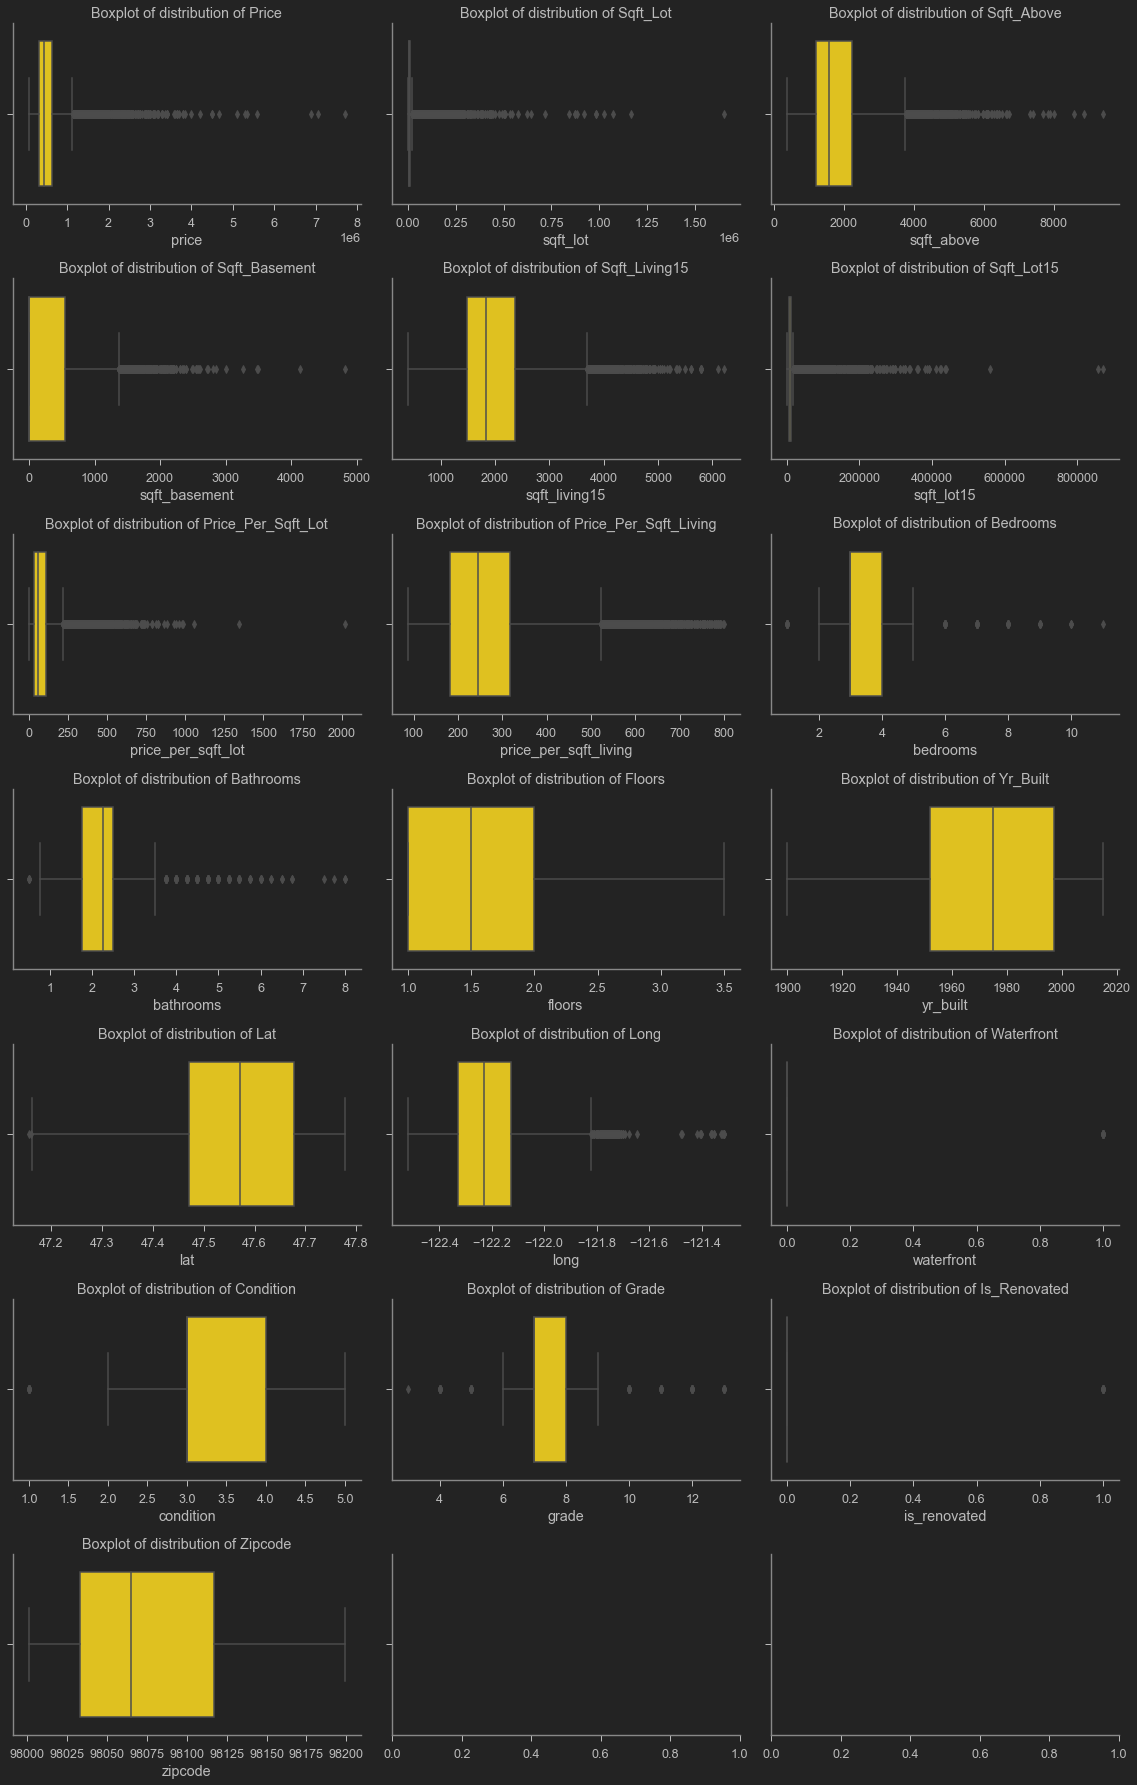

In [501]:
check_outliers_in_df(df_model,show_dfs=False)


____________________________________________________________
DataFrame Columns Boxenplot
____________________________________________________________


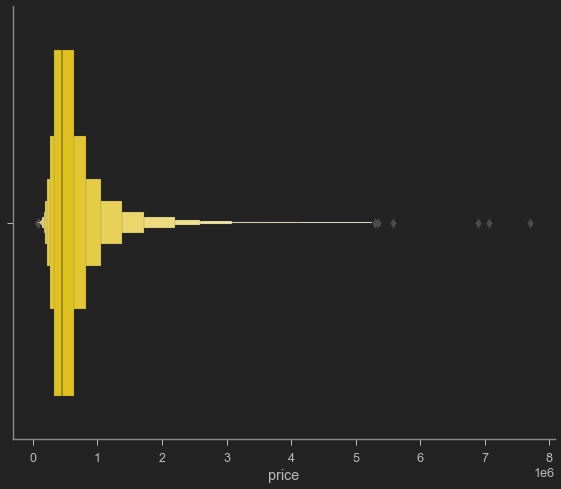

In [503]:
check_outliers_in_df(df_model[['price']],
                     chart_type='boxenplot',show_dfs=False)

In [513]:
df_model[find_outliers_IQR(df_model['price'])]

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_per_sqft_lot,price_per_sqft_living,bedrooms,bathrooms,floors,yr_built,lat,long,waterfront,condition,grade,is_renovated,zipcode
5,1230000.0,101930,3890,1530,4760,101930,12.067105,226.937269,4,4.50,1.0,2001,47.6561,-122.005,0,3,11,0,98053
21,2000000.0,44867,2330,720,4110,20336,44.576192,655.737705,3,2.75,1.0,1968,47.5316,-122.233,0,3,9,0,98040
49,1350000.0,65005,2165,588,2680,72513,20.767633,490.374137,3,2.50,1.0,1953,47.4041,-122.451,1,5,9,0,98070
69,1330000.0,20158,1600,1600,3390,20158,65.978768,415.625000,5,2.25,1.0,1965,47.6303,-122.215,0,3,8,0,98004
124,1450000.0,17789,1980,770,3060,11275,81.511046,527.272727,4,2.75,1.5,1914,47.6141,-122.212,0,3,8,1,98004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,1700000.0,8963,3120,710,2190,10777,189.668638,443.864230,4,3.50,2.0,2014,47.5990,-122.197,0,3,10,0,98004
21384,3570000.0,10584,3540,1310,3470,18270,337.301587,736.082474,5,4.50,2.0,2007,47.5943,-122.110,1,3,10,0,98008
21397,1220000.0,9444,3110,1800,4560,11063,129.182550,248.472505,4,3.50,1.5,2007,47.6502,-122.066,0,3,11,0,98074
21404,1580000.0,10125,3410,0,2290,10125,156.049383,463.343109,4,3.25,2.0,2007,47.5653,-122.223,0,3,10,0,98040


In [519]:
df_model[df_model.price>5500000]

,price,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price_per_sqft_lot,price_per_sqft_living,bedrooms,bathrooms,floors,yr_built,lat,long,waterfront,condition,grade,is_renovated,zipcode
3877,7060000.0,37325,7680,2360,3930,25449,189.149364,703.187251,5,4.50,2.0,1940,47.6500,-122.214,1,3,11,1,98004
4371,5570000.0,35069,6200,3000,3560,24345,158.829736,605.434783,5,5.75,2.0,2001,47.6289,-122.233,0,3,13,0,98039
7187,7700000.0,27600,8570,3480,3940,8800,278.985507,639.004149,6,8.00,2.5,1910,47.6298,-122.323,0,4,13,1,98102
9170,6890000.0,31374,8860,1030,4540,42730,219.608593,696.663296,6,7.75,2.0,2001,47.6305,-122.240,0,3,13,0,98039


## Multiple Linear Regression

## Polynomial Regression

In [321]:
from sklearn.preprocessing import PolynomialFeatures

In [325]:
features1 = [
    'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
    'bedrooms', 'bathrooms', 'floors', 'yr_built', 'waterfront', 'condition',
    'grade', 'is_renovated', 'zipcode'
]

In [332]:
poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(df_model_train[features1])
X_test_poly = poly_feat.fit_transform(df_model_train[features1])

lin_reg_sk_poly = linear_model.LinearRegression()
lin_reg_sk_poly.fit(X_train_poly, df_model_train['price'])
y_pred_poly = lin_reg_sk_poly.predict(X_test_poly)

print('Poly Model_1 ^2')
mean_squared_error = metrics.mean_squared_error(df_model_train['price'],
                                                y_pred_poly)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ',
      round(lin_reg_sk_poly.score(X_test_poly, df_model_train['price']), 3))
print('R-squared (testing) ',
      round(lin_reg_sk_poly.score(X_test_poly, df_model_train['price']), 3))

Poly Model_1 ^2
Mean Squared Error (MSE)  182115.41
R-squared (training)  0.758
R-squared (testing)  0.758


In [331]:
poly_feat = PolynomialFeatures(degree=3)
X_train_poly = poly_feat.fit_transform(df_model_train[features1])
X_test_poly = poly_feat.fit_transform(df_model_train[features1])

lin_reg_sk_poly = linear_model.LinearRegression()
lin_reg_sk_poly.fit(X_train_poly, df_model_train['price'])
y_pred_poly = lin_reg_sk_poly.predict(X_test_poly)

print('Poly Model_2 ^3')
mean_squared_error = metrics.mean_squared_error(df_model_train['price'],
                                                y_pred_poly)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ',
      round(lin_reg_sk_poly.score(X_test_poly, df_model_train['price']), 3))
print('R-squared (testing) ',
      round(lin_reg_sk_poly.score(X_test_poly, df_model_train['price']), 3))

Poly Model_2 ^3
Mean Squared Error (MSE)  197950.82
R-squared (training)  0.714
R-squared (testing)  0.714


# Playground

In [399]:
def distance(lat1, lon1, lat2, lon2):
    from math import cos, asin, sqrt, pi
    p = pi / 180
    a = 0.5 - cos(
        (lat2 - lat1) * p) / 2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos(
            (lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))  # 7918 for miles

In [500]:
df_distace=distance_(df, 'lat', 'long')
df_distace
# pd.concat([df,df_distace],axis=1,ignore_index=False)

,distance_from_downtown_mile
0,7.43
1,7.95
2,10.19
3,6.54
4,13.38
...,...
21414,6.46
21415,6.74
21416,1.74
21417,13.22


# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS